## Final Project Submission

* Student name: Hana Kerner 
* Student pace: Part Time
* Scheduled project review date/time: November 14, 2022
* Instructor name: Morgan Jones 
* Blog post URL:

![King County](KingCounty.jpeg)

# Overview  
***

Established in 1976, Sotheby’s International Realty has become the world’s premier luxury residential real estate brokerage. With a global footprint and international network spanning across 74 countries and territories, Sotheby's is most involved in New York, France, Italy, Madrid, Miami, Hong Kong, Bahamas, and Tokyo. Sotheby’s is working to gather a more nuanced understanding of the real estate market in King County, Washington. However, rather than selling new homes, their current interests lie with renovations. They have tasked us with gaining insights as to where they should advise homeowner’s to spend their money, when they are looking to renovate. 

Our goal is to help homeowners decide where they should allocate their time, money, and resources when renovating. Our focus is to provide advice to homeowners on how specific renovations may increase the estimated value of their homes, and what dollar value is attached to this. We are looking to gather insights into the historical housing market trends, to be able to provide homeowners with the best possible recommendations.  

Sotheby's is looking to tackle opportunities in markets where they do not have as strong of a footing. They have asked us to analyze the King County housing market. King County is located in the U.S. state of Washington. In the 2020 census, the population was 2,269,675, making it the most populous county in Washington, and the 13th-most populous in the United States. The county seat is Seattle, which is state's most populous city. 

We have been provided with the King County House Sales dataset, which is where the entirety of our data will come from. Our method parses through this data, and includes cleaning, preparing, visualizing, modeling, interpreting, and presenting the data. We will use data visualization and linear regression modeling to yield findings and support our recommendations. 

The features and trends that we will be forming recommendations around include:
- Square Footage of Living Space 
- Number of Bathrooms 
- Number of Bedrooms 
- Grade of Home
- Condition of Home

# Business Problem
***

We are looking to predict the sale price of houses in the King County Housing Market in King County, to create actionable insights for homeowners pertaining to the features of houses that will provide them with the highest financial gain. The homeowners will then be able to use these recommendations when moving forward with where to allocate their time and money with respect to their home renovations. 

**By analyzing raw real estate data and breaking down the trends of the housing market in King County, we will be able to advise homeowners on how increase the value of their property.**

The analysis below aims to answer the following questions:

1. **How does number of bedrooms impact the selling price of a home in King County?**

Understanding how the makeup of a house impacts its price will be crucial in being able to aid homeowners with their renovations and advise them with the most successful strategy to increase the value of their property. It seems likely that the number of bedrooms in a home may be related to its selling price.

2. **How does number of bathrooms impact the selling price of a home in King County?**

The same holds true here. Our expectation is that the more bathrooms a home has, the higher its selling price will be, but, by how much? Is this significant?

3. **How does grade impact the selling price of a home in King County?**

Grade can vary a lot in respect to a home, and in respect to how a home is being graded. Will we see consistency in the data? Does the grade of a home, from one rating to the next, impact the selling price? What is the makeup of this category, and how can we help homeowners implement it?

4. **How does condition impact the selling price of a home in King County?**
We believe that the condition of a home would be positively correlated to selling price, and are hoping to find out if this is a strong predictor for that price. If so, this may be a very feasible area for homeowners to make improvements, if it comes down to small repairs and adjustments to keep their home up to date.

***

These questions are crucial in deciding how we will advise homeowners to move forward, as we will have a better understanding of housing characteristics, and thus, an understanding of what homeowners should focus on to see the greatest possible returns.

# The Data
***

The data used for this project is from the King County Dataset. This is a dataset of real-estate data from King County, Washington. The dataframe is `kc_house_data`. This dataframe consists of 2,1597 rows and 21 columns. We will be cleaning and adjusting our data quite a bit, and ultimately, 'price', and a new variable that we will call `price_log`, will be the target variable. Each entry in this dataset represents a house sold in King County.

# Method 

Our data process will consist of multiple steps. Ultimately, we will be conducting statistical analyses and developing a Linear Regression model to predict the sale price of a King County house. The coefficients from this model will be used to find the precise dollar amounts for different features. These predictions will allow us to have concrete numbers and values to help homeowners make informed decisions when faced with renovations. 

Our data process will consist of:
***
- Importing and processing the data 
- Cleaning the data (handling missing values, datatypes, duplicates, etc.)
- Describing the data and relationships we may see
- Handling categorical variables 
- Transforming variables
- Scaling data 
- Handling Multicollinearity
- Fitting models
- Checking linear regression assumptions 
- Gathering insights and interpreting findings 
- Developing conclusions and recommendations 
***

## Import Data
***

Import libraries and standard packages to help us import data and conduct our statistical analyses

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display plot outputs 
%matplotlib inline

Use pandas function `.read_csv` to open up the comma separated values file from our data folder 

In [2]:
# Use data folder path to import and read dataset
df = pd.read_csv('data/kc_house_data.csv')

# Preview data 
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

Our data is imported as a dataframe under the `df` variable name. We can now dig deeper into the entries to get a better idea of what we are working with.

## Column Names and Descriptions for King County Data Set
***
We have been provided with information pertaining to each column of our dataset. Below consists of the descriptions that we have been given.

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors
***

## Clean Data

Here we will handle missing and duplicated values as well as any datatypes that may need changing. We will also have the opportunity to adjust the data as we see fit so that it can be as concise and simple as possible for moving forward with our analyses. 

First let's take a closer look at the data as a whole. We can use the `.info()` method to get a greater sense of the overall data structure, the datatypes, and potential missing values.

In [3]:
# Use info method 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

There is a lot we can take from this. We see all the column names and value counts for each of these columns. We can see that we have 21,597 rows and 21 columns. We also see there are some missing values in the `waterfront`, `view`, and `yr_renovated` columns. We also notice that we may need to alter some of the datatypes. 

We can use `.describe()` to look a little closer at the statistical values of our numeric columns

In [4]:
# Use describe method

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

We can check the null values using `'.isnull()`. We saw we had missing values and this will just return `True` or `False`, confirming that. 

In [5]:
# Use .isnull() with .any to check overall dataset by column 

df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

This is what we saw before. Looking closer, we know that in answering our questions we do not actually need to use the data from the `waterfront` or `view` categories, as these features will not be used for our renovation recommendations. We can drop both of these columns. `yr_renovated` may still be useful to us, so we will look at what proportion of the data we are missing and decide how to move forward with that column. We can also drop the `date` column while we are at it.

In [6]:
# Use .drop() to drop renovation and view columns 
# Use axis = 1 to specify that we are dropping columns 

df = df.drop(['waterfront', 'view', 'date'], axis=1)

In [7]:
# Check that this worked 

df.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7129300520  221900.0         3       1.00         1180      5650     1.0   
1  6414100192  538000.0         3       2.25         2570      7242     2.0   
2  5631500400  180000.0         2       1.00          770     10000     1.0   
3  2487200875  604000.0         4       3.00         1960      5000     1.0   
4  1954400510  510000.0         3       2.00         1680      8080     1.0   

   condition          grade  sqft_above sqft_basement  yr_built  yr_renovated  \
0    Average      7 Average        1180           0.0      1955           0.0   
1    Average      7 Average        2170         400.0      1951        1991.0   
2    Average  6 Low Average         770           0.0      1933           NaN   
3  Very Good      7 Average        1050         910.0      1965           0.0   
4    Average         8 Good        1680           0.0      1987           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98125  47.7210 -122.319           1690        7639  
2    98028  47.7379 -122.233           2720        8062  
3    98136  47.5208 -122.393           1360        5000  
4    98074  47.6168 -122.045           1800        7503

Now that we dropped those columns, we can look into the `yr_renovated` a bit closer.

In [8]:
# Sum the count of null values in the specified column 
# Divide this number by the amount of rows in the dataset
# Multiply by 100 to get a percentage of missing values 

renovated_missing = (df['yr_renovated'].isnull().sum() / len(df)) * 100
renovated_missing

17.78950780200954

We are missing around 18% of the values in this column, which is a lot. We do not want to drop nearly 20% of our dataset so we want to see what other method we can use to fill the null values in the `yr_renovated` column. If we look at our statistical data from using the `.describe()` function, we can see that the `mean` year renovated is `86.64` which does not make much sense. Our `median` is listed as `0` which also does not help us. Next, we may consider using the `mode`. 

In [9]:
# Use .mode() to find the most common value in the yr_renovated column 

df['yr_renovated'].mode()

0    0.0
dtype: float64

If we think about this, we now see that both our `median` and `mode` for this column is zero. The zero most likely indicates that the homes with these entries in the `yr_renovated` column have not been renovated. This also explains why our `mean` was not in the format of a year. With this understanding, the safest decision may be to fill in the null values with a `0` as well, indicating the homes have not been renovated. We can do this below.

In [10]:
# Use .fillna() function to replace missing values with zero 
# Use inplace = True to replace values on our df dataframe 

df['yr_renovated'].fillna(0, inplace=True)

In [11]:
# Use .info() to check that this worked with the Non-Null Content 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

Now that we have dealt with the null values we can look deeper into the datatypes. Immediately `sqft_basement` stands out as its listed as an `object` rather than `int` like `sqft_above` is. We can look closer at the column below using `.head()`. We also may want to change `yr_renovated` to an `int` rather than `float`, as this column lists years. We can do this first using `.astype('int64')`. Before moving on, we should look closer at the datatypes to see if any of our columns actually have categorical data rather than `int` or `float`. We see that `date`, `grade`, and `condition` are listed as objects which is fine. That being said, although we may not use it in our analysis, we can change a column like `zipcode` to `object` using the same `.astype('object')` function.

In [12]:
# Use .astype() to change yr_renovated to int64

df['yr_renovated'] = df['yr_renovated'].astype('int64')

In [13]:
# Use .astype() to change zipcode column to object 

df['zipcode'] = df['zipcode'].astype('object')

In [14]:
# Check to see this worked 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  object 
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

Now we can look into the `sqft_basement` column.

In [15]:
# Look into the sqft_basement column 

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         ?
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

We can see that there is an entry that has `?` as a value, which is not something we want in our data. Before changing the datatype of this column, let's check all columns for placeholder values that may be similar to `?`. We only have a few object columns, so hopefully this will not be an issue.

In [16]:
# Use .isin() and .any() to check each column for specified list of values 

df.isin(['?', 'None', 'null', 'N/A', 'NaN', '/']).any()

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

It looks like our other columns are ok, so we will continue to focus on the `sqft_basement` column for now.

In [17]:
# Look into unique values in the sqft_basement column 

df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

Although that is a long list, if we look through it, the `?` looks to be our only issue. Since this column is not an `int` or `float` column we do not have statistical data from the `.describe()` function above. Instead, let's look to see the `mode` of the data like we did for the `yr_renovated` column.

In [18]:
# Use .mode() for the sqft_renovated column 

df['sqft_basement'].mode()

0    0.0
dtype: object

Again, this value is zero. This may indicate that the majority of houses in our dataset do not have basements, or do not have data on those basements. Because of that, we can be comfortable using `0` as our mode and value to replace the `?` values with. 

In [19]:
# Use .replace() to replace 0 with ?
# Use inplace = True again to keep these new changes

df['sqft_basement'].replace('?', '0', inplace=True)

In [20]:
# Check that this worked

df['sqft_basement'].head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6         0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: object

Now we can change the datatype to float using `.astype(float)`

In [21]:
# Change datatype 

df['sqft_basement'] = df['sqft_basement'].astype(float)

In [22]:
# Check that this worked using .info()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  object 
 8   grade          21597 non-null  object 
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  int64  
 13  zipcode        21597 non-null  object 
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
dtypes: flo

That covers missing values, placeholder values, and datatype. Now we can use `.duplicated()` to check our data for duplicates. 

In [23]:
# Use .duplicated() and .any() to see if there are duplicates by column 

df.duplicated().any()

True

We do not have any duplicates. Now, we can use our cleaned data to comfortably move onto looking deeper into the distributions, relationships, and patterns we may find. 
***

## Describe and Prepare Data 
***

We will use visualizations and statistical testing to gain insights about our data. This step will help us gain knowledge for how we can best move forward and be of service to homeowners in as accurate a way as possible. 

To best prepare our data for modeling we will:
- Visualize our categorical variables 
- Transform our categorical variables with `get_dummies()`
- Visualize our continuous variables 
- Visualize distributions of relevant variables 
- Visualize distributions of top 100 expensive houses 
- Glance at our linear regression assumptions 
- Look into multicollinearity 
- Create log transformations to apply later 

So far, our data looks good after being cleaned. We know that we were dealing with a few categorical variables, and there may be other categorical variables that we did not catch earlier while simply cleaning the data. Let's check the number of unique values in each column to see if some columns only have a few unique values, which may indicate that the column should actually be a categorical variable rather than numeric. We can use `.nunique()` to do this.

In [24]:
# Check each column to see the number of unique values

df.nunique()

id               21420
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
condition            5
grade               11
sqft_above         942
sqft_basement      303
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

The columns `floors`, `condition`, and `grade` stand out here. We know that `condition` and `grade` are already categorical variables, but `floors` is listed as a `float`. Let's look a bit into each one, especially since these are values that we know we may want to use in our models. We know that a linear regression model will not properly represent these values unless they are numeric. We know we may need to convert these values into ones that our model will be able to process and interpret.

We can quickly create a few scatterplots to look at the data in these columns closer through the visualization.

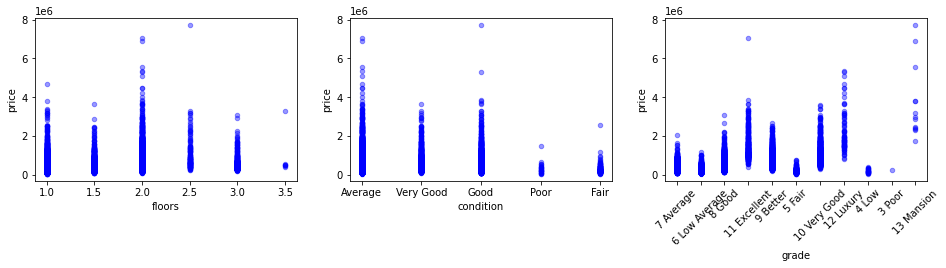

In [25]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

# Use for loop to loop through the three columns we want to see in the scatterplots below 
for col, ax in zip([ 'floors', 'condition', 'grade'], axes):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.4, color='b')
    plt.xticks(rotation = 45)

This further validates what we thought. The vertical lines suggest that we are working with categories. We already know that `condition` and `grade` are categorical variables that we may need to convert into numerical values so that our models can make sense of them. `floors` appears not to represent a continuous number, either, and may need to be treated as a category as well.

### Transforming Categorical Variables
***

We know when we need to transform a categorical variable for regression models, there are two approaches:
1) Perform label encoding<br>
2) Create dummy variables / one-hot-encoding

Label encoding consists of converting each value in a column to a number. This is one method for transforming a categorical variable into a numeric one so that our models can make sense of the values in the column. That being said, we will create dummy variables below. The advantage of this is that our numerical values cannot be misinterpreted as being continuous. We know one-hot-encoding is required when adding categorical variables in a regression model. One thing to be mindful of is the dummy variable trap where one variable can be predicted from all of this others. This would result in multicollinearity which is an issue in regression. We will avoid this trap by dropping one of the dummy variables by passing `drop_first = True` to our function `get_dummies()` from the `pandas` library.

In [26]:
# Look into floors

df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [27]:
# Look into condition 

df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [28]:
# Look into grade

df['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

We now have a better idea of the values that we will transform into dummy variables. We will create a list below to go through our three columns of interest. By using `pd.get_dummies()`, from each original column, each category will be converted into a new column, assigning a 1 or 0 to each new column. 

In [29]:
# Create a list that we can pass through the pd.get_dummies() function 

cats = ['floors', 'condition', 'grade']

We will create a new dataframe with our dummy columns, rather than dropping the original columns and then concatenating the new dummy columns.

In [30]:
# Use pd.get_dummies() to create a new dataframe with the dummy columns 

df_dum = pd.get_dummies(data= df, columns= cats, drop_first = True)

In [31]:
# Check that this worked 

df_dum.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  221900.0         3       1.00         1180      5650   
1  6414100192  538000.0         3       2.25         2570      7242   
2  5631500400  180000.0         2       1.00          770     10000   
3  2487200875  604000.0         4       3.00         1960      5000   
4  1954400510  510000.0         3       2.00         1680      8080   

   sqft_above  sqft_basement  yr_built  yr_renovated  ... grade_11 Excellent  \
0        1180            0.0      1955             0  ...                  0   
1        2170          400.0      1951          1991  ...                  0   
2         770            0.0      1933             0  ...                  0   
3        1050          910.0      1965             0  ...                  0   
4        1680            0.0      1987             0  ...                  0   

   grade_12 Luxury  grade_13 Mansion  grade_3 Poor  grade_4 Low  grade_5 Fair  \
0                0                 0             0            0             0   
1                0                 0             0            0             0   
2                0                 0             0            0             0   
3                0                 0             0            0             0   
4                0                 0             0            0             0   

   grade_6 Low Average  grade_7 Average  grade_8 Good  grade_9 Better  
0                    0                1             0               0  
1                    0                1             0               0  
2                    1                0             0               0  
3                    0                1             0               0  
4                    0                0             1               0  

[5 rows x 34 columns]

Looking at the column titles, thinking about our ultimate regression models, it may be wise to rename some of our columns now so that our linear regression models can read our data properly, and without error. Let's first look at our new column names and then rename them.

In [32]:
df_dum.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'floors_1.5',
       'floors_2.0', 'floors_2.5', 'floors_3.0', 'floors_3.5',
       'condition_Fair', 'condition_Good', 'condition_Poor',
       'condition_Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better'],
      dtype='object')

The spaces in our `grade` columns will likely pose issues. Additionally, the `.` in our `floors` columns may cause some trouble. Let's handle that now. 

In [33]:
# Remove space from column names and replace with _

df_dum.columns = [col.replace(' ', '_') for col in df_dum.columns]

In [34]:
# Remove . from column names and replace with _

df_dum.columns = [col.replace('.', '_') for col in df_dum.columns]

In [35]:
# Check that this worked 

df_dum.head()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  221900.0         3       1.00         1180      5650   
1  6414100192  538000.0         3       2.25         2570      7242   
2  5631500400  180000.0         2       1.00          770     10000   
3  2487200875  604000.0         4       3.00         1960      5000   
4  1954400510  510000.0         3       2.00         1680      8080   

   sqft_above  sqft_basement  yr_built  yr_renovated  ... grade_11_Excellent  \
0        1180            0.0      1955             0  ...                  0   
1        2170          400.0      1951          1991  ...                  0   
2         770            0.0      1933             0  ...                  0   
3        1050          910.0      1965             0  ...                  0   
4        1680            0.0      1987             0  ...                  0   

   grade_12_Luxury  grade_13_Mansion  grade_3_Poor  grade_4_Low  grade_5_Fair  \
0                0                 0             0            0             0   
1                0                 0             0            0             0   
2                0                 0             0            0             0   
3                0                 0             0            0             0   
4                0                 0             0            0             0   

   grade_6_Low_Average  grade_7_Average  grade_8_Good  grade_9_Better  
0                    0                1             0               0  
1                    0                1             0               0  
2                    1                0             0               0  
3                    0                1             0               0  
4                    0                0             1               0  

[5 rows x 34 columns]

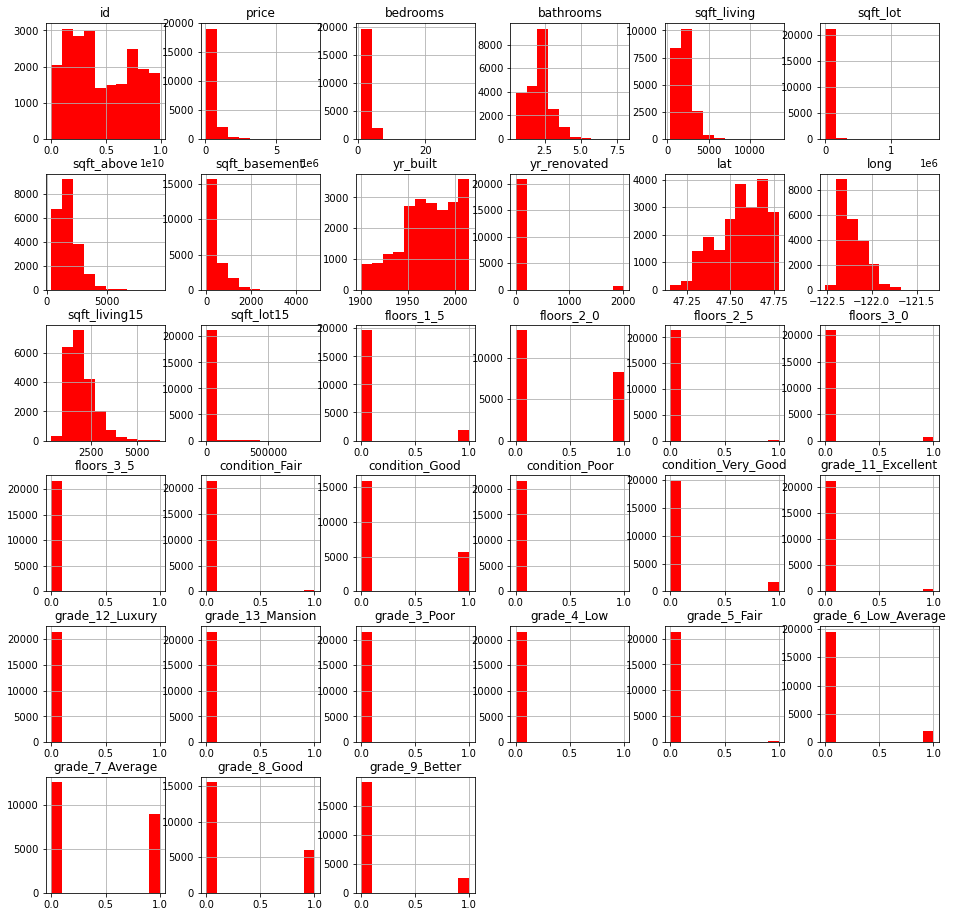

In [36]:
# Look at overview of histograms 

df_dum.hist(figsize=(16,16), color='r');

We can clearly see the dummy variables here, where many of our histograms are split between values of 0 and values of 1. We can be comfortable moving on from transforming categorical variables and begin to look into other transformations and adjustments that may need to be made. 

### Visualizing Distributions 
***

For our continuous variables, we want our distributions to be as close to normal as possible. As we look at the histograms above, we can see that `bedroom`, `bathrooms`, and `sqft_living` may need to be transformed. Additionally, we are reminded that we have many columns that are not useful to us, that we may be able to drop. This includes `id`, `yr_built`, `lat`, and `long`. We can do all of this below.

Before messing with anything, let's look into our columns a bit closer, starting with `bedrooms`. We know that one of the questions that we want to answer is how bedroom count impacts the sale price of a house. With this information, we may be able to suggest to homeowners if an investment in an extra bedroom, or even multiple, is worth the cost of the endeavor. All of that being said, we know this is an important variable for us. Let's look at the distribution below. 

##### Bedroom Distribution
***

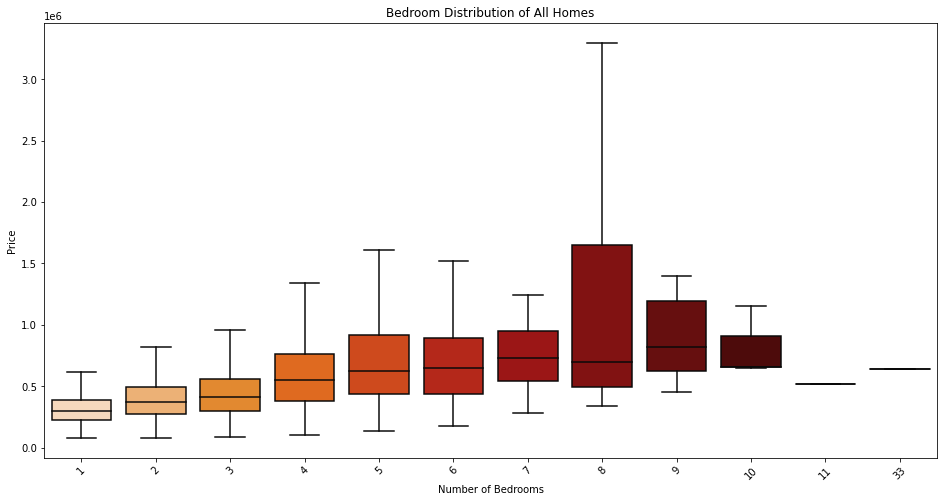

In [37]:
# Show distribution of bedrooms in a box plot 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning, remove outliers
sns.boxplot(x='bedrooms', y='price', data=df_dum, palette='gist_heat_r', showfliers = False)

# Create axis labels and organiztion
plt.title('Bedroom Distribution of All Homes')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

This is helpful, and we can see a significant outlier at `33 bedrooms`. Additionally, the box plot shows us that we have our highest interquartile range (IQR) at 8 bedrooms. As a reminder, IQR measures the spread of our data, specifically the middle 50%. This shows us where the majority of our values lie, and this larger value indicates that the central portion of our data for 8 bedrooms is spread out further, relating to sale price. We removed outliers, but now know we have outliers in terms of sale price, most noticeably when there are 5 or 6 bedrooms. Let's look at all of this a bit closer below.

In [38]:
# Use value_counts() to look closer at our bedroom values 

valc = df_dum['bedrooms'].value_counts()
valc

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

This just tells us how many values we have for each bedroom count. We can see we only have 1 house listed with both 11 and 33 bedrooms, whereas we have nearly 10,000 homes listed with 3 bedrooms. Let's look at the same information in percentage form.

In [39]:
# Use valc variable from above to see the proportion of houses with each bedroom count

(valc/len(df_dum))*100

3     45.487799
4     31.865537
2     12.779553
5      7.413067
6      1.259434
1      0.907533
7      0.175950
8      0.060194
9      0.027782
10     0.013891
11     0.004630
33     0.004630
Name: bedrooms, dtype: float64

We can see that over 75% of our listings have 3 or 4 bedrooms. Although the quantity is helpful, we want to relate this to `price`. We can make a separate dataframe using only the top 100 sale prices of homes in King's County from our data. We will use the `sort_values()` function to sort our `price` column in `descending` order. We will then create a new dataframe called `top_100` that includes only the first `100` values in the dataframe that we just had sorted, thus including only the top 100 listings by `sale price`.

In [40]:
# Sort current dataframe and store in new variable top100

top100 = df_dum.sort_values(by=['price'], ascending=False)

In [41]:
# Check that this worked by checking the price column

top100['price'].head()

7245    7700000.0
3910    7060000.0
9245    6890000.0
4407    5570000.0
1446    5350000.0
Name: price, dtype: float64

In [42]:
# Adjust dataframe to only include first 100 values 

top100 = top100[0:100]

In [43]:
# Check that this worked by checking shape 

top100.shape

(100, 34)

Now that we have our new dataframe, we can look at the same `bedroom` value counts that we did before, now just looking at the listings with the top 100 sale prices. This may give us a better idea of how bedroom count and selling price are related.

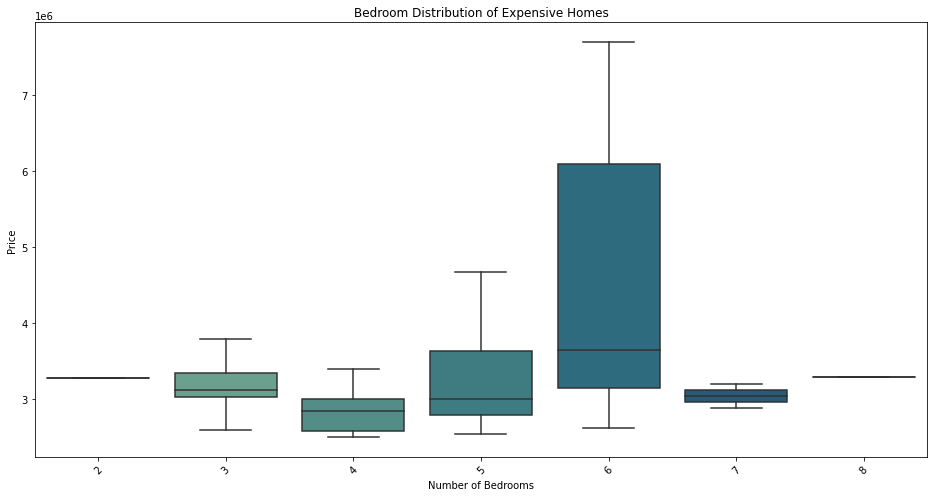

In [44]:
# Show distribution of bedrooms by top 100 selling price in a box plot 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning, remove outliers
sns.boxplot(x='bedrooms', y='price', data=top100, palette='crest', showfliers = False)

# Create axis labels and organiztion
plt.title('Bedroom Distribution of Expensive Homes')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

This boxplot looks quite different from our prior one. Here, our highest IQR lies with 6 bedrooms. Our outliers seem to be significantly minimized, and homes with 5 bedrooms also appears to become more relevant to our discussion. Let's continue to look closer at the percentage, as we did before.

In [45]:
# Use value_counts() to look closer at our top 100 bedroom values by percentage

val100 = top100['bedrooms'].value_counts()
(val100/len(top100)) * 100

4    41.0
5    37.0
3    11.0
6     7.0
7     2.0
8     1.0
2     1.0
Name: bedrooms, dtype: float64

We see that the majority of homes that are in the top 100 of our data by price have 4 bedrooms, followed by 5 bedrooms. After these observations, we know that over 75% of all homes in King County have 3-4 bedrooms, and over 75% of the most expensive homes in King County have 4-5 bedrooms. Next, we can use these same steps to look into `bathrooms`.

##### Bathroom Distribution
***

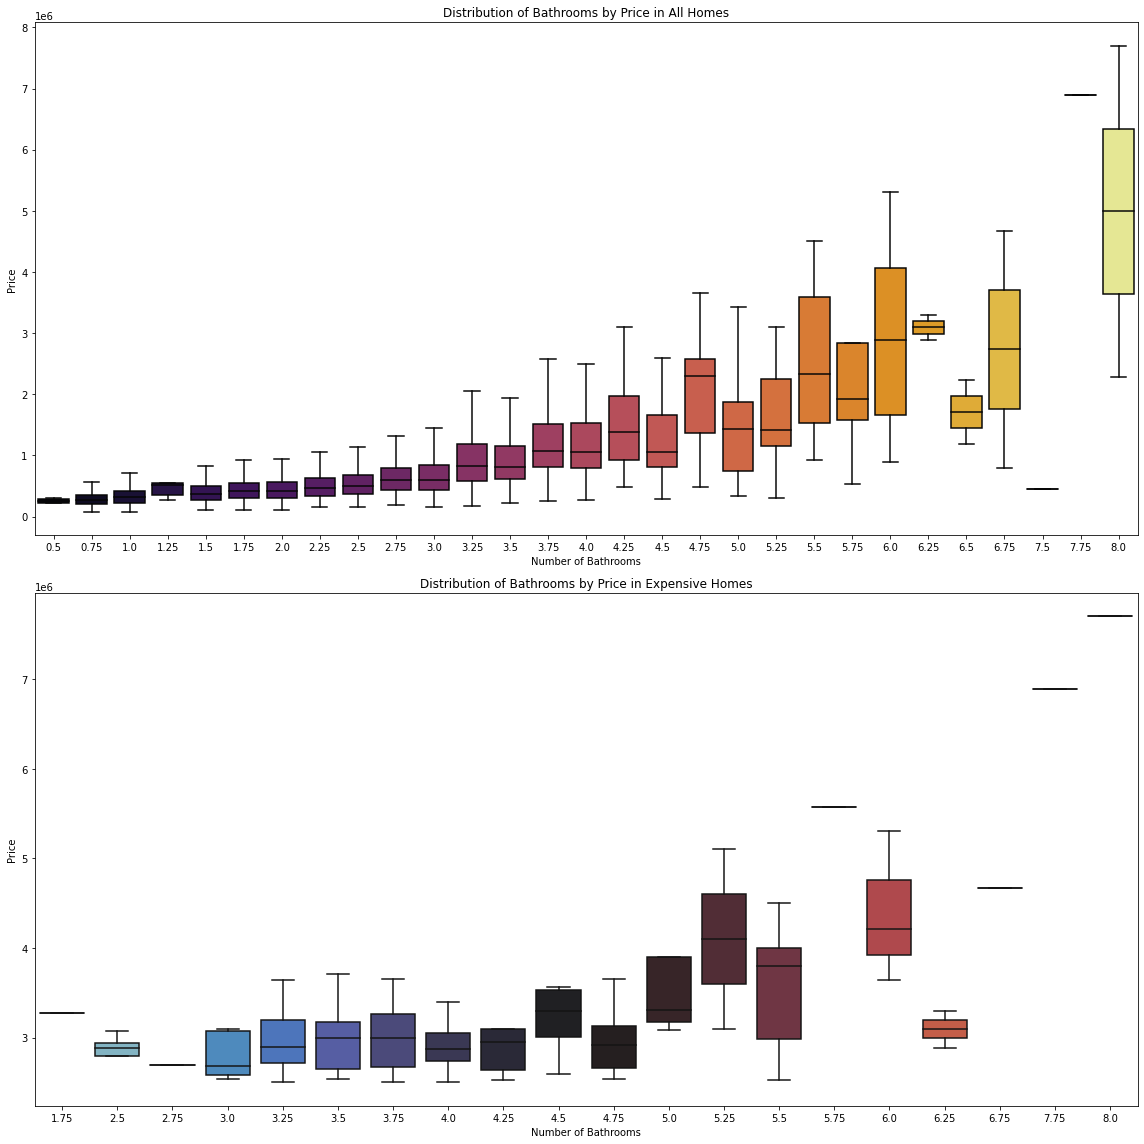

In [46]:
# Show distribution of bathrooms in box plot subplots, showing all the data and our top 100 data 

# Create figures with matplotlib 
fig, axes = plt.subplots(2, 1, figsize=(16,16))

# Create box plots using seaborn that we imported at the beginning, remove outliers
sns.boxplot(ax = axes[0], x='bathrooms', y='price', data=df_dum, palette='inferno', showfliers = False)
sns.boxplot(ax = axes[1], x='bathrooms', y='price', data=top100, palette='icefire', showfliers = False)

# Create titles, axes labels and organiztion for all homes
axes[0].set_title('Distribution of Bathrooms by Price in All Homes')
axes[0].set_xlabel('Number of Bathrooms')
axes[0].set_ylabel('Price')

# Create titles, axes labels and organiztion for top homes
axes[1].set_title('Distribution of Bathrooms by Price in Expensive Homes')
axes[1].set_xlabel('Number of Bathrooms')
axes[1].set_ylabel('Price')

# Set layout to avoid subplot overlap
plt.tight_layout()

# Show distribution
plt.show()

In [47]:
# Use value_counts() to see the proportion of houses with each bedroom count

val = df_dum['bathrooms'].value_counts()
(val/len(df_dum)) * 100

2.50    24.896976
1.00    17.831180
1.75    14.113071
2.25     9.478168
2.00     8.936426
1.50     6.690744
2.75     5.486873
3.00     3.486595
3.50     3.384729
3.25     2.727231
3.75     0.717692
4.00     0.629717
4.50     0.463027
4.25     0.365792
0.75     0.328749
4.75     0.106496
5.00     0.097236
5.25     0.060194
5.50     0.046303
1.25     0.041672
6.00     0.027782
5.75     0.018521
0.50     0.018521
8.00     0.009261
6.25     0.009261
6.75     0.009261
6.50     0.009261
7.50     0.004630
7.75     0.004630
Name: bathrooms, dtype: float64

In [48]:
# Use value_counts() to look closer at our top 100 bathroom values by percentage

val100 = top100['bathrooms'].value_counts()
(val100/len(top100)) * 100

3.25    16.0
4.00    12.0
3.00     9.0
3.50     9.0
4.25     9.0
4.75     7.0
4.50     6.0
3.75     6.0
5.50     5.0
2.50     4.0
5.00     4.0
6.00     3.0
6.25     2.0
5.25     2.0
5.75     1.0
7.75     1.0
2.75     1.0
6.75     1.0
1.75     1.0
8.00     1.0
Name: bathrooms, dtype: float64

We will want to look closer at this. But, for now, we know that about 78% of all homes in King County have between 1-2.5 bathrooms and about 60% of the most expensive homes in King County have between 3-4.5 bathrooms.

Before moving forward, let's take a closer look at our `grade`, `condition`, and `sqft_living` variables to get a better idea of what we are working with when it comes to our model. Let's also look at the distribution of `price`, our target variable.

##### Grade Distribution
***

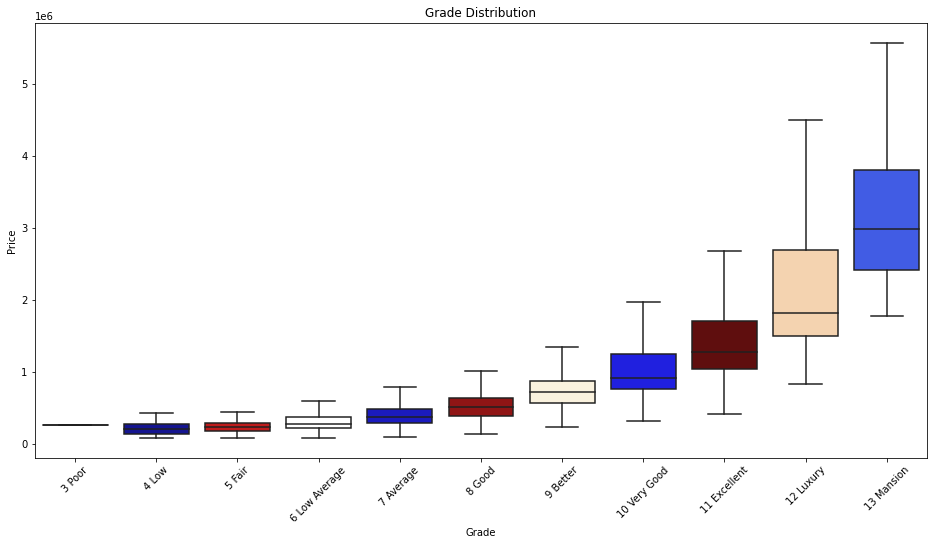

In [49]:
# Use original dataframe (before we added dummy variables) to glance at grade distribution 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning - remove outliers and order by hand 
sns.boxplot(x='grade', y='price', data=df, palette='flag', showfliers = False,
           order=['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good',
                 '9 Better', '10 Very Good', '11 Excellent', '12 Luxury', '13 Mansion'])

# Create axis labels and organiztion
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

This helps us see the spread of `grade` in relation to `price`. We know that for our modeling, we will use a different dataframe that includes `dummy variables`, which separates out our `grade` column and created new binary columns for each grade label. That being said, looking at this plot, from our original dataframe, shows us that `grade` may be a very strong predictor of price. This will help us with the `r-squared` value of our models, and ultimately, may give us a strong recommendation for our homeowners in where to commit their renovation money. 

##### Condition Distribution
***

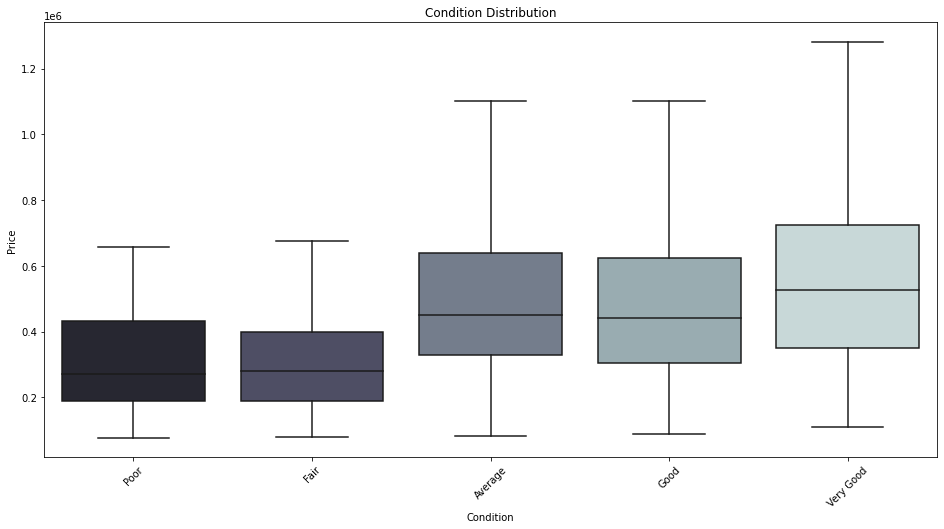

In [50]:
# Use original dataframe (before we added dummy variables) to glance at condition distribution 

# Create figure with matplotlib 
plt.figure(figsize=(16,8))

# Create box plot using seaborn that we imported at the beginning - remove outliers and order by hand 
sns.boxplot(x='condition', y='price', data=df, palette='bone', showfliers = False, 
            order=['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

# Create axis labels and organiztion
plt.title('Condition Distribution')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Show distribution
plt.show()

Like our box and whisker plot for `grade`, this plot looking at the distribution of `condition` according to `price` is very helpful. We, again, see that `condition` may be a good and positive predictor of `price`.

##### Square Footage Distribution
***

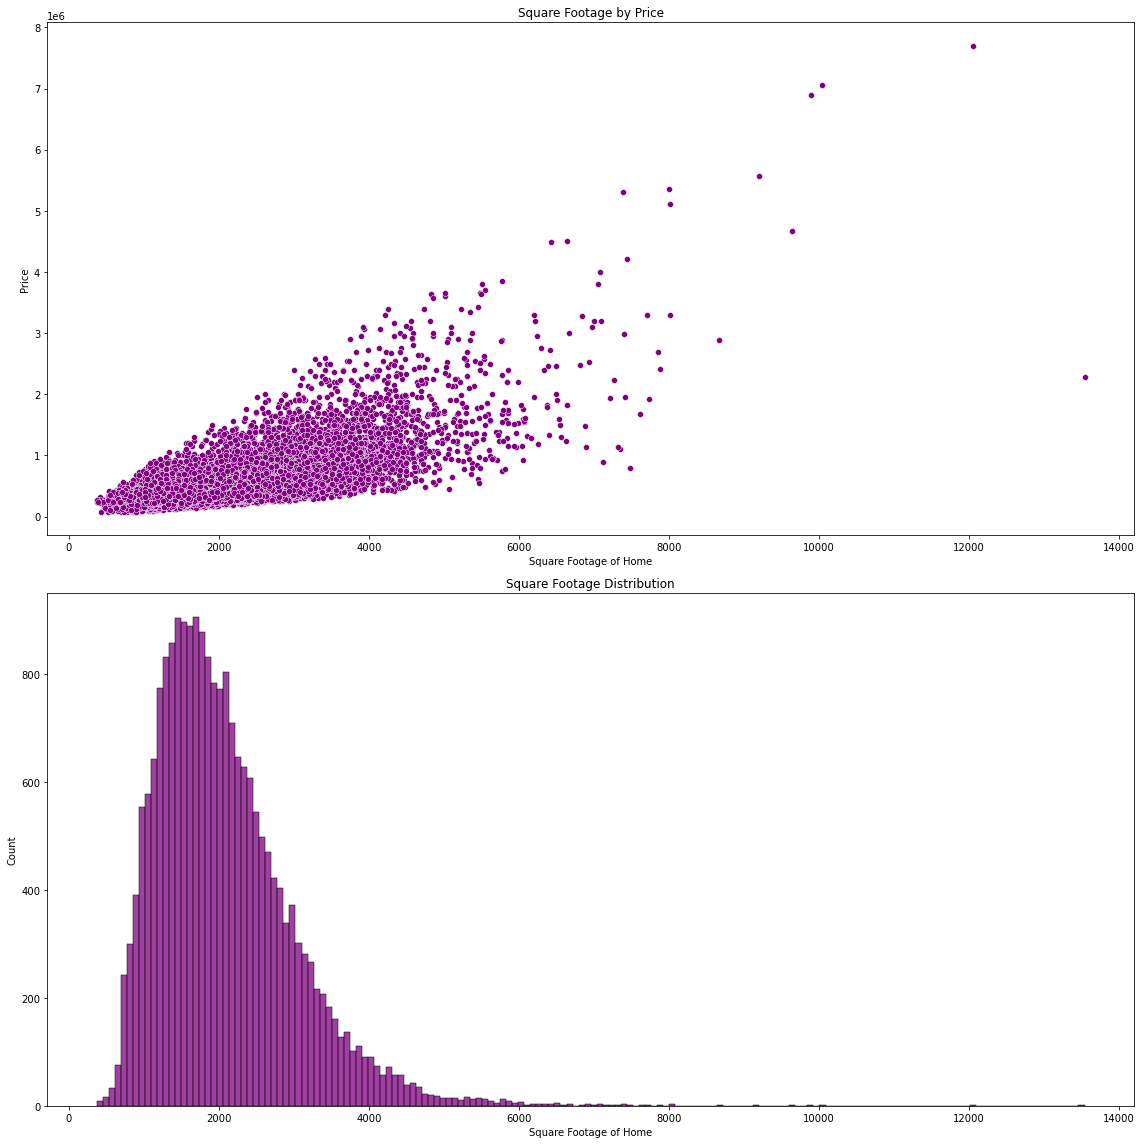

In [51]:
# Use current dataframe to glance at sqft_living distribution 

# Create subplots with matplotlib 
fig, axes = plt.subplots(2, 1, figsize=(16,16))

# Create scatterplot and histogram for our continuous variable using seaborn 
sns.scatterplot(ax = axes[0], x='sqft_living', y='price', data=df_dum, color='purple')
sns.histplot(ax = axes[1], x='sqft_living', data=df_dum, color='purple')

# Create titles, axes labels and organiztion for our scatterplot
axes[0].set_title('Square Footage by Price')
axes[0].set_xlabel('Square Footage of Home')
axes[0].set_ylabel('Price')

# Create titles, axes labels and organiztion for our histogram
axes[1].set_title('Square Footage Distribution')
axes[1].set_xlabel('Square Footage of Home')

# Set layout to avoid subplot overlap
plt.tight_layout()

# Show distribution
plt.show()

This is helpful. We clearly have a lot of data here but again see that this predictor looks to have a positive and potentially linear relationship with `price`. We also see that this variable looks to be skewed to the right, with outliers, so it may be a good idea to use a log transformation or method of normalization and feature scaling as we get closer to our modeling.

##### Price Distribution
***

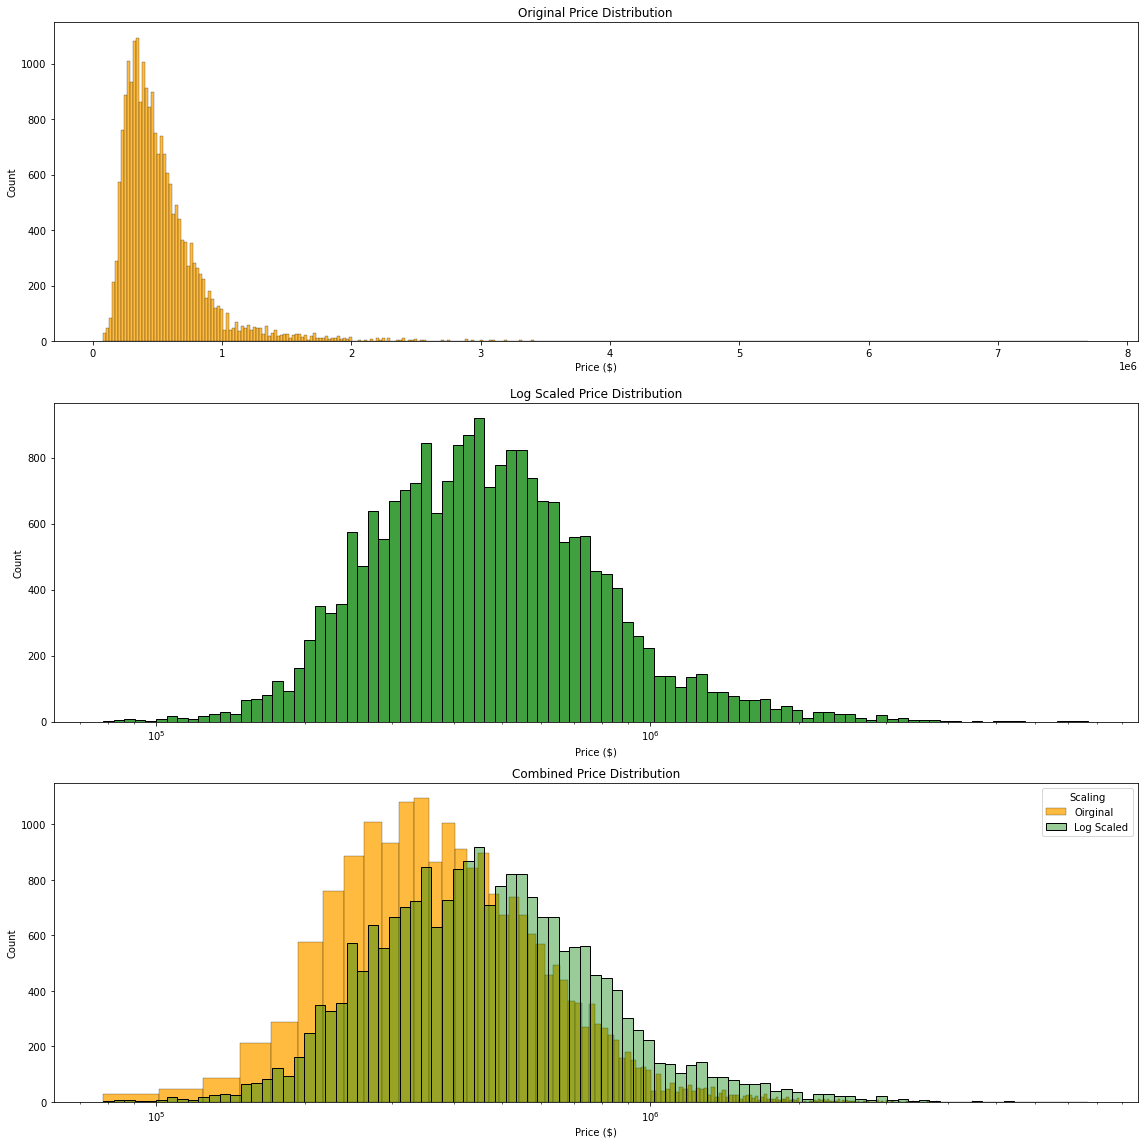

In [52]:
# Create regular histogram, log-scaled histogram, and a combined histogram to glance at price distribution

# Create subplots with matplotlib 
fig, axes = plt.subplots(3, 1, figsize=(16,16))

# Create histograms for our continuous variable using seaborn 
sns.histplot(ax = axes[0], x='price', data=df_dum, color='orange')
sns.histplot(ax = axes[1], x='price', data=df_dum, color='green', log_scale=True)
sns.histplot(ax = axes[2], x='price', data=df_dum, color='orange')
sns.histplot(ax = axes[2], x='price', data=df_dum, color='green', log_scale=True, alpha = .4)

# Create titles, axes labels and organiztion for our original histogram
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price ($)')

# Create titles, axes labels and organiztion for our log scaled histogram
axes[1].set_title('Log Scaled Price Distribution')
axes[1].set_xlabel('Price ($)')

# Create titles, axes labels and organiztion for combined histogram
axes[2].set_title('Combined Price Distribution')
axes[2].set_xlabel('Price ($)')
axes[2].legend(title='Scaling', loc='upper right', labels=['Oirginal', 'Log Scaled'])

# Set layout to avoid subplot overlap
plt.tight_layout()

# Show distribution
plt.show()

Our first histogram showed us that our price data is pretty skewed, and we may want to use a log transformation below. We were able to use `seaborn` to get a visual for what this may look like in a plot, using the `log_scaled` condition and setting it to `True` with our second plot. Our third plot gives us a direct visual of how the two distributions line up against one another, and we can see the `log_scaled` transformation slightly normalizes the data for us which may be helpful with our modeling. We will work with all of this feature scaling once we get to our models.

### Linear Regression Assumptions
***

As we get closer to modeling, it is crucial for us to begin thinking about the linear regression assumptions. As we know, if some of these assumptions are not satisfied, we cannot trust and therefore not move forward with our results. The three main assumptions that we need to explore are:

**1. Linearity** <br>
**2. Homoescedasticity** <br>
**3. Normality**

We will also look into **multicollinearity** as we get into our modeling. For now, we will look into **linearity** and **multicollinearity**. We will dig deeper into the other assumptions once we have developed our final model, and need to check that we can be confident with it.

Now, we will check for **linearity**. This assumption requires that there is a linear relationship between the dependent variable (y) and our independent variables (x). These are also referred to us the response variable and predictors, respectively. We are looking to see that a change in Y is constant with a change in X. The best way to test this assumption is through scatterplots, or pairplots. Here, it is also important to keep an eye out for outliers, to eliminate a potential unwanted impact on the model. We will use pairplots below, where we are looking to see that a straight line fits the data. This is a preemptive look at the data, and again, once we develop our final model, we will check to make sure the linearity condition is met there. 

In [177]:
# Use seaborn to check for linearity with pairplots
# Save image to project folder

# sns.pairplot(df_dum)
# plt.savefig('pairplots.png')

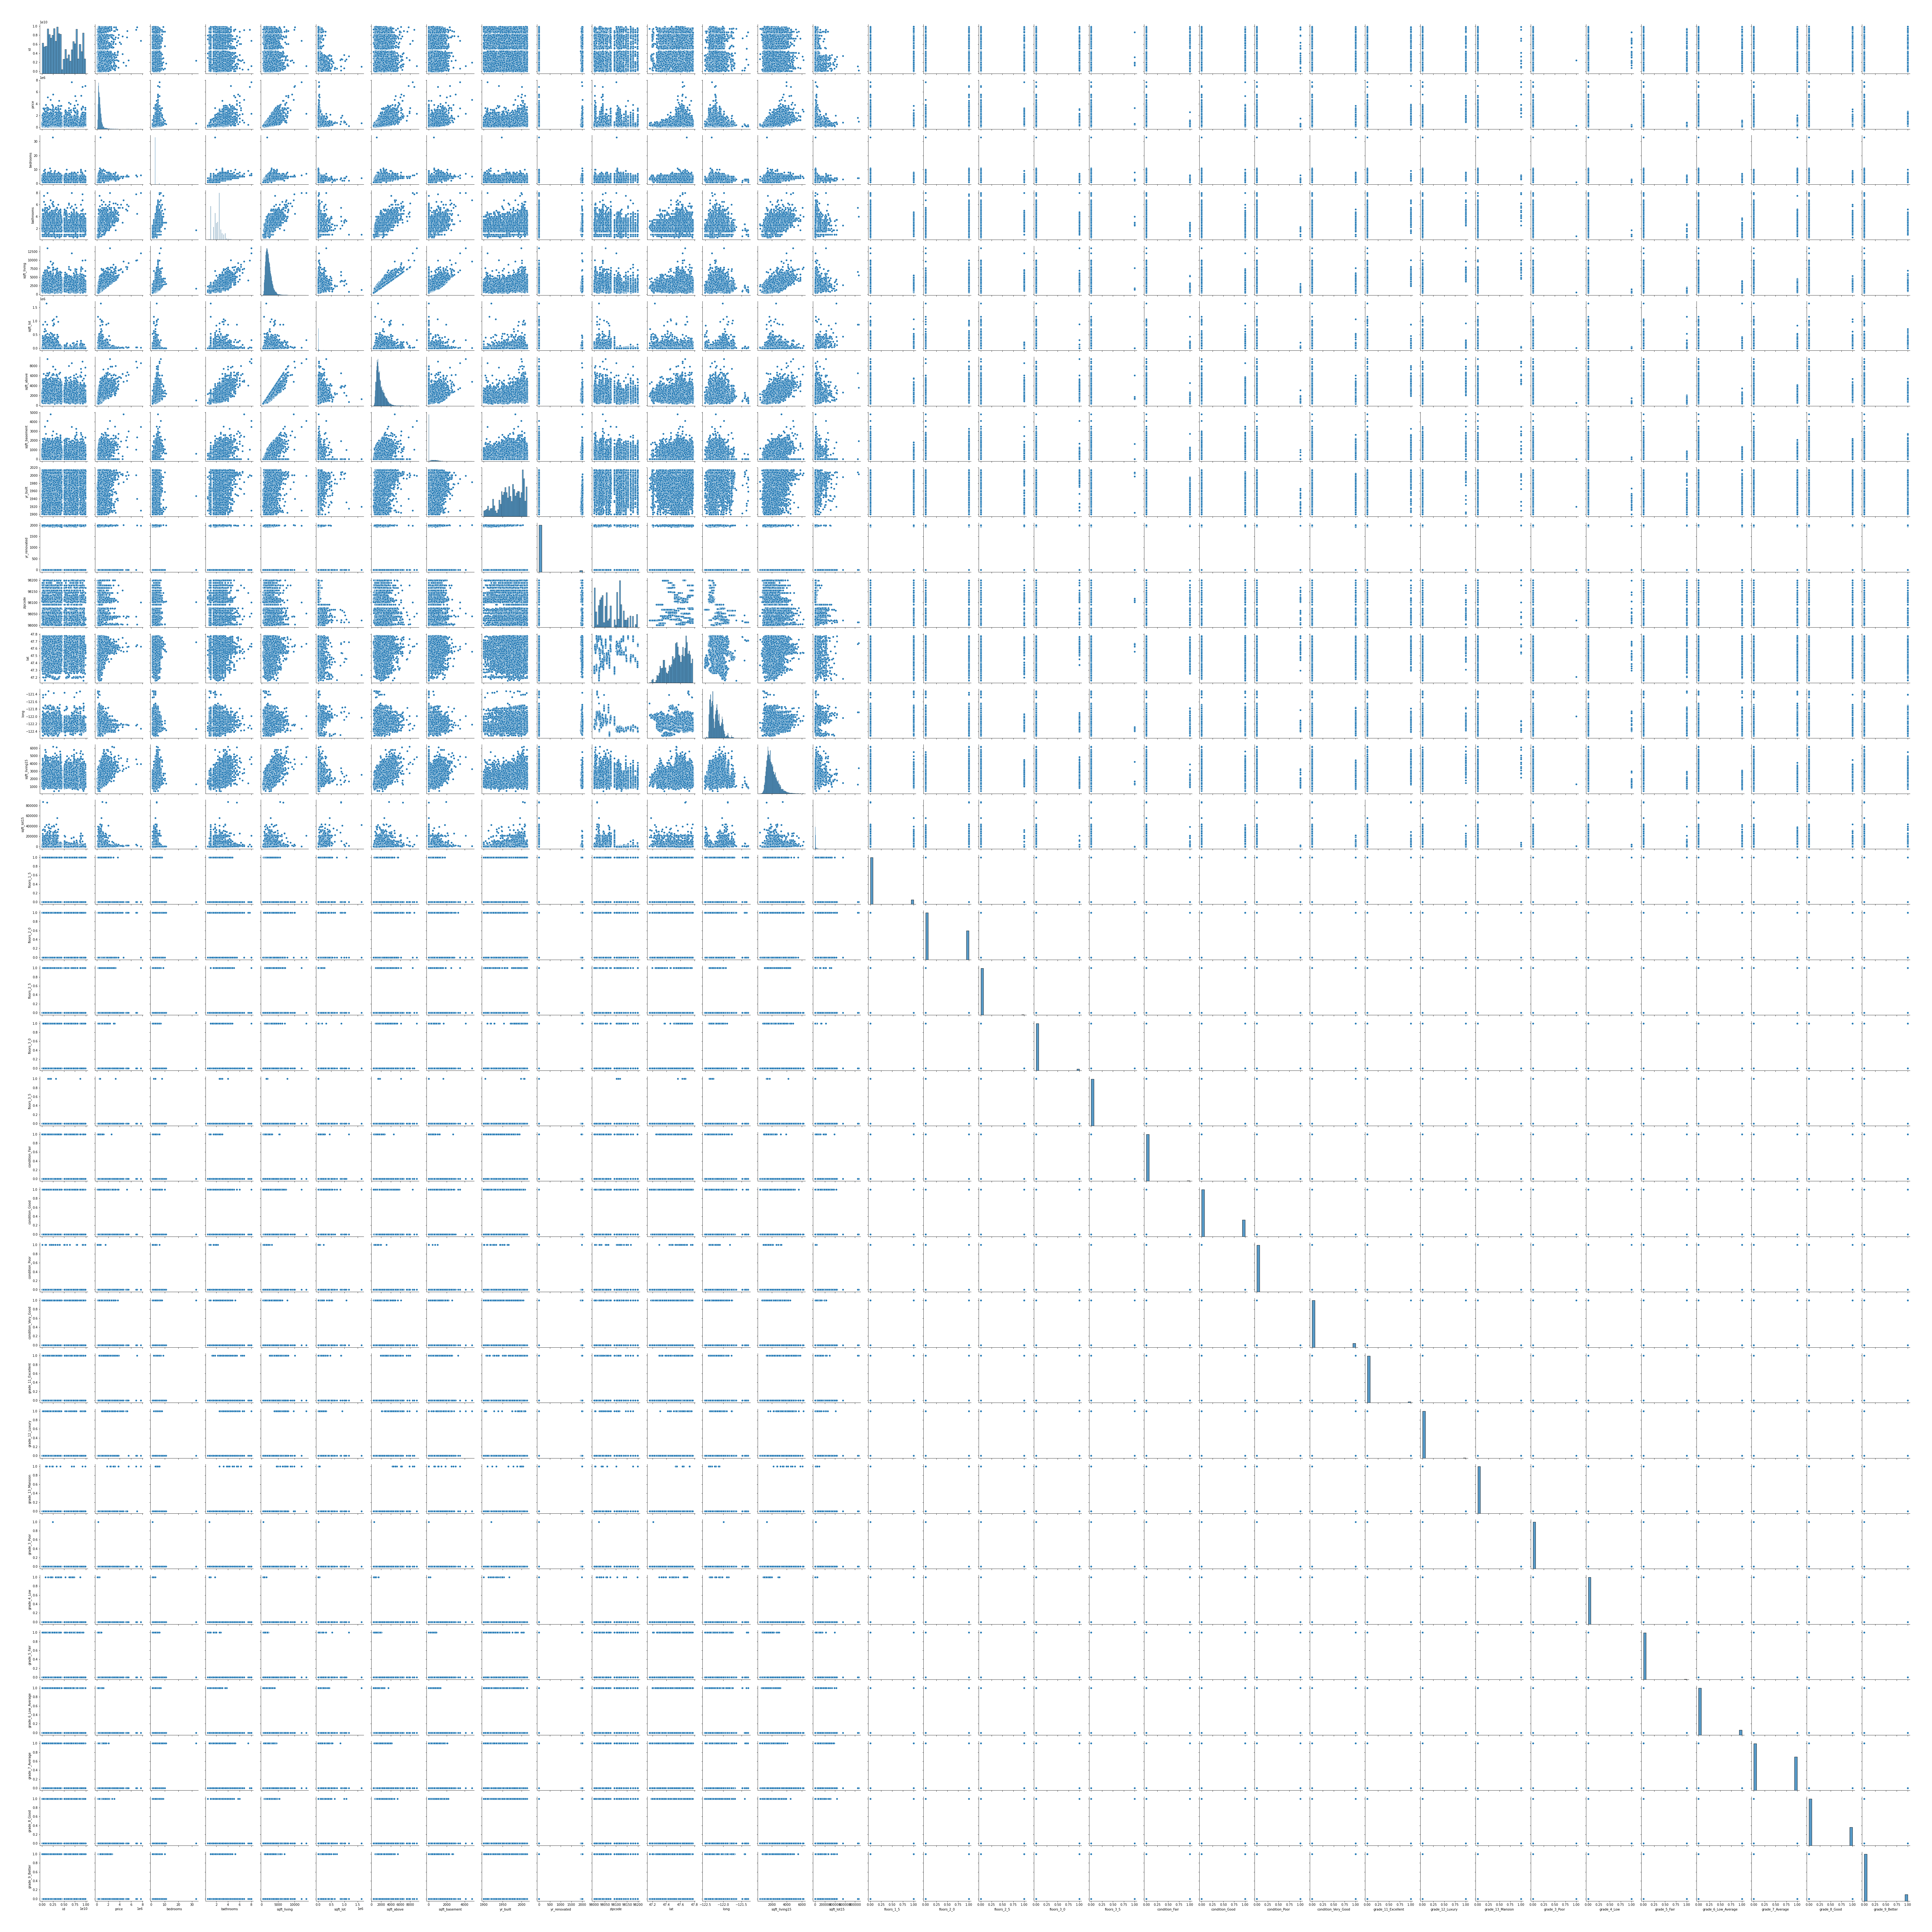

In [176]:
# Import and display image so do not have to run this every time 
# https://www.folkstalk.com/2022/10/how-to-get-image-in-jupyter-notebook-with-code-examples.html
from IPython import display

display.Image("./pairplots.png")

### Multicollinearity of Features
***

Multicollinearity is when multiple of our independent variables, or predictors, are correlated, rather than being independent of one another. As we know, this can create a significant issue for our models, if one predictor variable can be accurately linearly predicted by another. In short, rather than changing one predictor while keeping all other variables constant, we see that one predictor ends up being associated with the change in another. Ultimately, this makes our coefficients and p-values potentially less reliable. Below, we will look into this by creating a correlation matrix to explore the `.corr()` function, and see the pairwise correlations. We can then use `.stack()` and a subset to return only the highly correlated pairs. After that, we will create a heatmap using `seaborn` to visualize the correlation table.

In [54]:
# Create correlation matrix using .corr()

df_dum.corr()

id     price  bedrooms  bathrooms  sqft_living  \
id                   1.000000 -0.016772  0.001150   0.005162    -0.012241   
price               -0.016772  1.000000  0.308787   0.525906     0.701917   
bedrooms             0.001150  0.308787  1.000000   0.514508     0.578212   
bathrooms            0.005162  0.525906  0.514508   1.000000     0.755758   
sqft_living         -0.012241  0.701917  0.578212   0.755758     1.000000   
sqft_lot            -0.131911  0.089876  0.032471   0.088373     0.173453   
sqft_above          -0.010799  0.605368  0.479386   0.686668     0.876448   
sqft_basement       -0.004359  0.321108  0.297229   0.278485     0.428660   
yr_built             0.021617  0.053953  0.155670   0.507173     0.318152   
yr_renovated        -0.010612  0.117855  0.017900   0.047177     0.051060   
lat                 -0.001798  0.306692 -0.009951   0.024280     0.052155   
long                 0.020672  0.022036  0.132054   0.224903     0.241214   
sqft_living15       -0.002701  0.585241  0.393406   0.569884     0.756402   
sqft_lot15          -0.138557  0.082845  0.030690   0.088303     0.184342   
floors_1_5          -0.003326  0.015896  0.044751  -0.139381    -0.058504   
floors_2_0           0.026607  0.232696  0.220934   0.518412     0.419928   
floors_2_5          -0.000073  0.122845  0.057482   0.081098     0.100543   
floors_3_0          -0.005871  0.020036 -0.075682   0.084248    -0.054066   
floors_3_5          -0.010054  0.018132  0.001076   0.018195     0.007054   
condition_Fair      -0.012780 -0.051432 -0.049463  -0.075933    -0.063984   
condition_Good      -0.025497 -0.030759 -0.009841  -0.166756    -0.083850   
condition_Poor       0.003471 -0.019886 -0.032520  -0.042932    -0.033246   
condition_Very_Good -0.009534  0.057531  0.027500  -0.034765    -0.018284   
grade_11_Excellent  -0.019837  0.357589  0.116596   0.247293     0.345964   
grade_12_Luxury     -0.015084  0.291068  0.062257   0.159734     0.238136   
grade_13_Mansion    -0.003880  0.211806  0.039026   0.095118     0.144424   
grade_3_Poor        -0.005110 -0.005155 -0.017434  -0.012087    -0.011565   
grade_4_Low         -0.002903 -0.031618 -0.068012  -0.055599    -0.053935   
grade_5_Fair        -0.025640 -0.084549 -0.113175  -0.138740    -0.127198   
grade_6_Low_Average -0.015476 -0.209463 -0.239492  -0.366185    -0.312486   
grade_7_Average     -0.015575 -0.316053 -0.104791  -0.313457    -0.358915   
grade_8_Good         0.042285  0.004576  0.073140   0.189426     0.071115   
grade_9_Better       0.009121  0.235859  0.160294   0.264756     0.318499   

                     sqft_lot  sqft_above  sqft_basement  yr_built  \
id                  -0.131911   -0.010799      -0.004359  0.021617   
price                0.089876    0.605368       0.321108  0.053953   
bedrooms             0.032471    0.479386       0.297229  0.155670   
bathrooms            0.088373    0.686668       0.278485  0.507173   
sqft_living          0.173453    0.876448       0.428660  0.318152   
sqft_lot             1.000000    0.184139       0.015031  0.052946   
sqft_above           0.184139    1.000000      -0.051175  0.424037   
sqft_basement        0.015031   -0.051175       1.000000 -0.130085   
yr_built             0.052946    0.424037      -0.130085  1.000000   
yr_renovated         0.004979    0.020645       0.065008 -0.202555   
lat                 -0.085514   -0.001199       0.109853 -0.148370   
long                 0.230227    0.344842      -0.142369  0.409993   
sqft_living15        0.144763    0.731767       0.199288  0.326377   
sqft_lot15           0.718204    0.195077       0.015885  0.070777   
floors_1_5           0.014043   -0.053413      -0.022605 -0.380590   
floors_2_0           0.019688    0.578738      -0.207217  0.526998   
floors_2_5           0.004704    0.104832       0.012725 -0.028586   
floors_3_0          -0.043789   -0.014084      -0.085082  0.196654   
floors_3_5          -0.005351    0.009136      -0.002223  0.012085   
conditio

This will be incredibly helpful to look into, but for now we can narrow it down even further for ourselves. Now we can use `stack` to return only the highly correlated pairs, which we will define as over `.6`. Below, we will create a new dataframe that holds the absolute value of each correlation. We will use `stack` to stack the `row : column` pairs into a multindex, use `reset_index()` to set the multindex to separate columns, and then use `sort_values()` to order the values in `descending` order. We will then adjust the column names and index to make our new table more presentable.

In [55]:
# Create new dataframe called df_stack
stack_df = df_dum.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Use zip and list combine the variable name columns - Columns are named level_0 and level_1 by default
stack_df['pairs'] = list(zip(stack_df.level_0, stack_df.level_1))

# Set new 'pairs' column as index
stack_df.set_index(['pairs'], inplace = True)

# Drop old columns with level names 
stack_df.drop(columns=['level_1', 'level_0'], inplace = True)

# Change correlation column name from 0 to corr
stack_df.columns = ['corr']

# Drop duplicates - be mindful of perfect correlations we may be dropping
stack_df.drop_duplicates(inplace=True)

# Drop null values 
stack_df = stack_df.dropna()

In [56]:
# Return dataframe with correlation over .6 and less than 1

multicol = (stack_df[(stack_df['corr'] > .6) & (stack_df['corr'] < 1)])
multicol

corr
pairs                                 
(sqft_above, sqft_living)     0.876448
(sqft_living, sqft_living15)  0.756402
(sqft_living, bathrooms)      0.755758
(sqft_living15, sqft_above)   0.731767
(sqft_lot15, sqft_lot)        0.718204
(sqft_living, price)          0.701917
(sqft_above, bathrooms)       0.686668
(sqft_above, price)           0.605368

With the variables `sqft_living`, `sqft_above`, `sqft_living15`, `bathrooms`, `sqft_lot`, and `price`, we now know to keep these in mind as some of these are highly corrlated. We will likely remove a few of them to remove collinear features in our model. Looking at the columns, many of them have to do with square feet, so it is not odd to see that these variables are correlated. Now we can look into the heatmap.

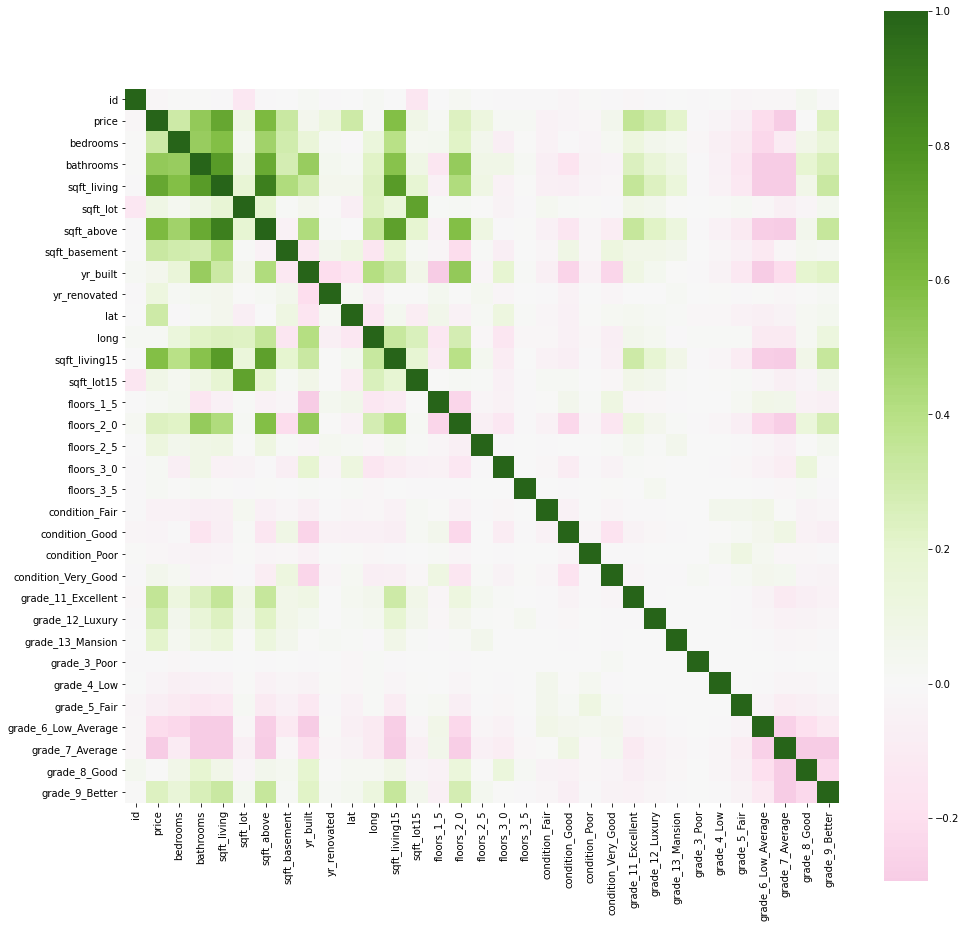

In [57]:
# Use seaborn to visualize heatmap 

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df_dum.corr(), center=0, cmap='PiYG', square=True, robust=True);

This reiterates what we know, and we see a small area of positive correlations revolving around `price`, `bedrooms`, `bathrooms`, and `sqft_living`. 

### Log Transformations
***

Before moving on, let's look at our continuous variables. With our model, we want to determine the optimal coefficients. If we transform our variables so that they have certain properties, including normality, we know that this will improve the predictive performance of our regression model. This will also help us with our final regression assumptions, and ultimately, allow us to make the most accurate predictions and recommendations when it comes to homeowner renovations. All of that being said, we may want to normalize and scale some of our continuous variables once we begin to develop our models. This may be through log transformations, standardization, or other methods. Looking at their distributions can help us decide where we may be able to improve our models

One option for transforming non-normal variable distributions is to apply a logarithmic function and observe its impact of the distribution. Log transformations can help reduce skewness and reduce variability of data. 

We will glance at the distributions below, but not make any concrete changes to our dataset. We know that when we use a `train-test split`, which we will discuss in more detail below, data preparation and transformations should happen after the split to avoid `data leakage`. We want to keep the test data as similar as possible so that we can accurately make predictions. 

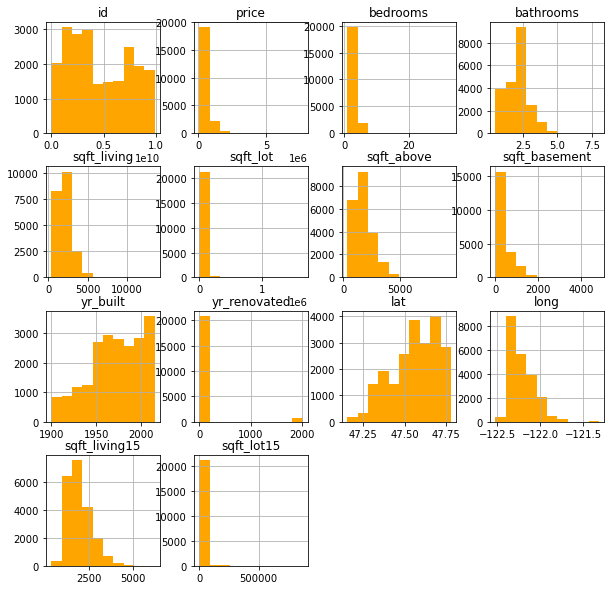

In [58]:
# Start by looking at the distributions of our continuous variables

# Create cont variable to store variables that are not objects and have more than 10 unique values 
cont = df_dum.loc[:, ((df_dum.dtypes != 'object') & (df.nunique() > 10))]

# Create histograms of these variables to see the distributions
cont.hist(figsize=(10,10), color='orange');

We have a couple of things to do from here. For starters, we are reminded that we do not need to use every column, and some of them do not make much sense in the context of our modeling anyway, like `id`. We are not using any location data so we can also remove `lat`, and `long`. `yr_renovated` is not helpful for us, nor `yr_built`. Let's drop these columns from our dataframe, and then continue with our continuous variables.

In [59]:
# Drop unwanted columns, clean up the dataframe 

df_dum = df_dum.drop(['id', 'lat', 'long', 'yr_built'], axis=1)

In [60]:
# Check that this worked 

df_dum.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0  221900.0         3       1.00         1180      5650        1180   
1  538000.0         3       2.25         2570      7242        2170   
2  180000.0         2       1.00          770     10000         770   
3  604000.0         4       3.00         1960      5000        1050   
4  510000.0         3       2.00         1680      8080        1680   

   sqft_basement  yr_renovated zipcode  sqft_living15  ...  \
0            0.0             0   98178           1340  ...   
1          400.0          1991   98125           1690  ...   
2            0.0             0   98028           2720  ...   
3          910.0             0   98136           1360  ...   
4            0.0             0   98074           1800  ...   

   grade_11_Excellent  grade_12_Luxury  grade_13_Mansion  grade_3_Poor  \
0                   0                0                 0             0   
1                   0                0                 0             0   
2                   0                0                 0             0   
3                   0                0                 0             0   
4                   0                0                 0             0   

   grade_4_Low  grade_5_Fair  grade_6_Low_Average  grade_7_Average  \
0            0             0                    0                1   
1            0             0                    0                1   
2            0             0                    1                0   
3            0             0                    0                1   
4            0             0                    0                0   

   grade_8_Good  grade_9_Better  
0             0               0  
1             0               0  
2             0               0  
3             0               0  
4             1               0  

[5 rows x 30 columns]

In [61]:
# Adjust cont variable for new changes 

cont = df_dum.loc[:, ((df_dum.dtypes != 'object') & (df.nunique() > 10))]

Now, looking at the distributions that we plotted above, we can use log transformations and see if that visually normalizes the data, as many of those histograms are skewed or non-normal. We already know that this looked like a promising solution with our `price` data, and hopefully that will hold true for some of our other variables.

We are also going to drop `sqft_basement` from our log transformations. We will work with how to handle this variable later, but for now, we remember that we replaced many of the `?` and other unknown values in this column with `0`. We do not want to use a log transformation here as we will get an error from our zero inflated variable. We cannot take the logarithm of zero.

In [62]:
# Drop sqft_basement column from cont variable 

cont = cont.drop(['sqft_basement', 'yr_renovated'], axis=1)

In [63]:
# Check that this worked 

cont.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0  221900.0         3       1.00         1180      5650        1180   
1  538000.0         3       2.25         2570      7242        2170   
2  180000.0         2       1.00          770     10000         770   
3  604000.0         4       3.00         1960      5000        1050   
4  510000.0         3       2.00         1680      8080        1680   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

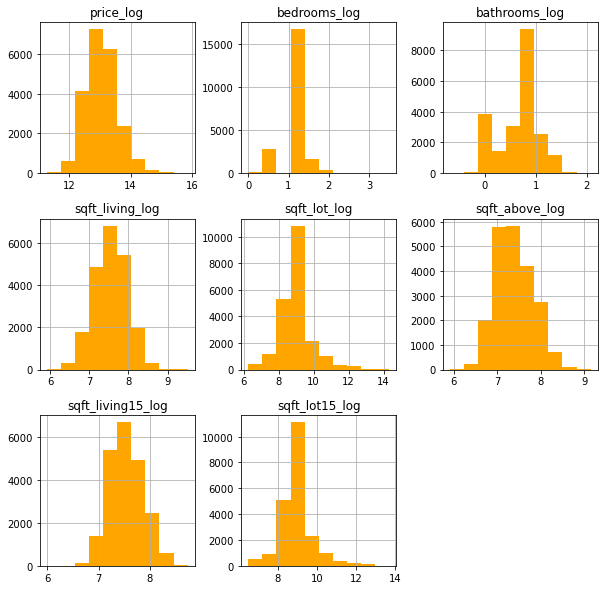

In [64]:
# Transforming non normal features

# Use for loop to create new column names, store under logs
logs = [f'{col}_log' for col in cont.columns]

# Use numpy to transform columns in our cont list to logs, store under logged
logged = np.log(cont)

# Apply column names to our logged variable 
logged.columns = logs

# Create histograms to see new distributions 
logged.hist(figsize = (10,10), color = 'Orange');

Our transformations look more normal than they did before, except for `bedrooms_log` and `bathrooms_log`. This is helpful information heading into our modeling, and we will test a model that uses the log data for these variables, except for `bedrooms` and `bathrooms`. Right now, we can drop these columns from our list of continuous variables, and then drop their log transformations from our list of log transformed variables. After that, we can create a new dataframe that includes the new log transformations, combined with all of our data, to use later. 

In [65]:
# Drop bathrooms and bedrooms from our list of continuous variables 
cont = cont.drop(['bathrooms', 'bedrooms'], axis=1)

# Drop bathrooms_log and bedrooms_log from our list of log transformed columns 
logged = logged.drop(['bathrooms_log', 'bedrooms_log'], axis=1)

In [66]:
# # Drop columns that we plan to replace with our log transformations & create new dataframe using pd.concat()

log_df = pd.concat([df_dum.drop(cont.columns, axis=1), logged],  axis=1)

In [67]:
# Check that this worked 

log_df.head()

bedrooms  bathrooms  sqft_basement  yr_renovated zipcode  floors_1_5  \
0         3       1.00            0.0             0   98178           0   
1         3       2.25          400.0          1991   98125           0   
2         2       1.00            0.0             0   98028           0   
3         4       3.00          910.0             0   98136           0   
4         3       2.00            0.0             0   98074           0   

   floors_2_0  floors_2_5  floors_3_0  floors_3_5  ...  grade_6_Low_Average  \
0           0           0           0           0  ...                    0   
1           1           0           0           0  ...                    0   
2           0           0           0           0  ...                    1   
3           0           0           0           0  ...                    0   
4           0           0           0           0  ...                    0   

   grade_7_Average  grade_8_Good  grade_9_Better  price_log  sqft_living_log  \
0                1             0               0  12.309982         7.073270   
1                1             0               0  13.195614         7.851661   
2                0             0               0  12.100712         6.646391   
3                1             0               0  13.311329         7.580700   
4                0             1               0  13.142166         7.426549   

   sqft_lot_log  sqft_above_log  sqft_living15_log  sqft_lot15_log  
0      8.639411        7.073270           7.200425        8.639411  
1      8.887653        7.682482           7.432484        8.941022  
2      9.210340        6.646391           7.908387        8.994917  
3      8.517193        6.956545           7.215240        8.517193  
4      8.997147        7.426549           7.495542        8.923058  

[5 rows x 30 columns]

This looks good. Now we can move onto modeling, and have already created a new dataframe that we can use.

## Modeling
***

Here, we will go through multiple iterations testing our different features against our response variable, and seeing what our `r-squared` value is. This will be our main measure of predictive performance. We will look at multiple metrics throughout this process. 

We will use OLS regression and to determine the success of our model by using: 

`R-squared`: Value communicating how much of the variability of our dependent variable (price) can be explained by the model <br>
`Adjusted R-squared`: Considers and tests different independent variables against the model. Our r-squared value does not do this, so if we see a difference between the two, we will use the adjusted r-squared<br>
`Null hypothesis`: Our null hypothesis for these models is that there is not a relationship between price and any chosen variable<br>
`Alpha`: Our alpha value will be .05<br>
`P-value`: This is our metric in checking the null hypothesis, and determining the validity of our models predictors. If our p-value is below our alpha of .05, we can reject our null hypothesis<br>
`Coefficients`: These are values we can use to explain teh relationship between our predictors and our outcome variable <br>

### Baseline Model
##### Train-Test Split
***

One of the first things we need to do here is perform a train-test split. As we know, to evaluate the model we will be comparing our predicted values with our actual values, the difference being the residuals. For our homeowners, we want to be able to **predict** which home renovations have the potential to make them the highest dollar amount, we do not just want to evaluate outdated information. The train-test split will help us get an idea of how well our model can perform with new data. Thus, with our split, a portion of our data will be used as a sample to `train` our model. This data will fit a linear regression, compute the parameter estimates, and finally, calculate our predictive performance by comparing the actual targets to those fitted by our model. 

In short, the training set will be used to build a model, and the model will be validated by the test set.


It is important that we randomly split the data to avoid overfitting. We also need to be mindful about the size of our split. In general, a training set size of 70-80% and test set size of 20-30% is acceptable. This is important because fitting a model to only a small portion of the data will likely lead to underfitting, while training a model on too much of the data will likely lead to overfitting. We can use the `train_test_split` function from `sklearn` to help split our data. Additionally, we will use `random_state` set to a number of our choosing within our function, for reproducibility of our results. 

**We will perform a train-test split with our final model, but it is still helpful for us to glance at this now and see where we are starting from.**

In [68]:
# Import train_test_split from sklearn 

from sklearn.model_selection import train_test_split

In [69]:
# Let's rename our current dataframe to use in our models 

base_df = df_dum

In [70]:
# Create our independent and dependent variables

X = base_df.drop(['price'], axis=1)
y = base_df['price']

For our first model we will use a split of 75% train, 25% test ratio. We will print the length to see the actual size of our sets.

In [71]:
# Create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 2)

# Print the length of each split
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


We can now feed our data into our Linear Model that we can import through `scikit-learn` via `LinearRegression` module. Using this, we can git a model to our data, using the training data to teach the model the patterns, and allow it to predict the price of a home. 

In [72]:
# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Use linreg to create linear regression object
linreg = LinearRegression()

# Fit object to training data 
linreg.fit(X_train, y_train)

# Use linreg.predict to create predictions on the train and test data and assign to new variables
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Next, we can look into `residuals` and calculate the `mean squared error (MSE)` for our training and test sets. As we know, our residuals are the difference between our predicted values (𝑦̂), with our actual values (𝑦). In other words, the difference between the observed value of our response variable and that of the predicted variable:

$r_{i} = y_{i} - \hat y_{i}$ 

As a summary metric to compare the residuals of our models, we can measure all of the points in our train and test set using the `MSE`. A higher MSE indicates a worse model fit. We also know if our model has a higher MSE for our training set in comparison to that of our test set, then our model is overfitting, meaning it is not generalizable and will not hold to future cases. If both training and test sets have a high MSE, then we have the opposite issue of underfitting by being *too* generalizable. 

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$
***

In [73]:
# Create variables for train test residuals

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [74]:
# Print these values 

print(train_residuals)
print(test_residuals)

5197     108654.178323
19790    394460.055701
5275    -156838.312927
15317     91788.922181
18485      7965.505726
             ...      
1099     127552.312971
18898    110468.888688
11798     31828.276130
6637    -155368.170152
2575     207750.903531
Name: price, Length: 16197, dtype: float64
570      -15020.388825
19700    129399.341037
13482   -142711.986726
11504    105502.729533
18868     39217.571856
             ...      
17367    129642.763486
5136      51889.745975
14566   -326098.811540
7628     -16804.407465
2652       4059.350660
Name: price, Length: 5400, dtype: float64


We can compute the MSE directly with the `mean_squared_error()` function in `sklearn`.

In [75]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Apply function to training and test sets 
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

# Print results
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 49483124836.06012
Test Mean Squared Error: 52521317044.54456


There is not a massive difference between the train and test MSE which is what we were looking for, but our error is quite high. Our train set error is smaller than our test set error, so our validation process indicates that we may be slightly overfitting. As we know, an overfit model is not generalizable and will not hold to future cases, so we need to be mindful of this. 

### Linear Regression Using StatsModels
Use `statsmodels.api` to run OLS on data
***

In [78]:
# Import libraries from statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

We can seperate out the outcome variable 'price' out of `final_df`, and use the a `'+'.join()` command on the predictors to make this more simple.

In [79]:
# Use price as dependent variable 
outcome = 'price'

# Use columns except for price as independent variables
predictors = base_df.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [80]:
# Create our fitted linear regression model

model = ols(formula=formula, data=base_df).fit()

In [81]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     855.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:50   Log-Likelihood:            -2.9032e+05
No. Observations:               21597   AIC:                         5.808e+05
Df Residuals:                   21499   BIC:                         5.816e+05
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.396e+05   1.44e+04      9.718      0.000    1.11e+05    1.68e+05
zipcode[T.98002]     1.078e+04   1.48e+04      0.728      0.467   -1.83e+04    3.98e+04
zipcode[T.98003]    -1883.7549   1.33e+04     -0.141      0.888    -2.8e+04    2.42e+04
zipcode[T.98004]     7.423e+05   1.31e+04     56.867      0.000    7.17e+05    7.68e+05
zipcode[T.98005]     2.768e+05   1.58e+04     17.558      0.000    2.46e+05    3.08e+05
zipcode[T.98006]     2.389e+05   1.18e+04     20.216      0.000    2.16e+05    2.62e+05
zipcode[T.98007]     2.414e+05   1.66e+04     14.497      0.000    2.09e+05    2.74e+05
zipcode[T.98008]      2.95e+05   1.33e+04     22.129      0.000    2.69e+05    3.21e+05
zipcode[T.98010]     4.517e+04    1.9e+04      2.379      0.017    7956.953    8.24e+04
zipcode[T.98011]      1.23e+05   1.49e+04      8.265      0.000    9.38e+04    1.52e+05
zipcode[T.98014]     9.099e+04   1.77e+04      5.134      0.000    5.63e+04    1.26e+05
zipcode[T.98019]     8.806e+04   1.51e+04      5.846      0.000    5.85e+04    1.18e+05
zipcode[T.98022]     1.179e+04   1.42e+04      0.828      0.408   -1.61e+04    3.97e+04
zipcode[T.98023]    -2.883e+04   1.16e+04     -2.491      0.013   -5.15e+04   -6140.813
zipcode[T.98024]     1.525e+05   2.09e+04      7.290      0.000    1.12e+05    1.94e+05
zipcode[T.98027]     1.482e+05   1.22e+04     12.191      0.000    1.24e+05    1.72e+05
zipcode[T.98028]     1.319e+05   1.33e+04      9.928      0.000    1.06e+05    1.58e+05
zipcode[T.98029]     2.098e+05    1.3e+04     16.195      0.000    1.84e+05    2.35e+05
zipcode[T.98030]     3600.8117   1.37e+04      0.264      0.792   -2.32e+04    3.04e+04
zipcode[T.98031]     1.073e+04   1.34e+04      0.799      0.424   -1.56e+04     3.7e+04
zipcode[T.98032]     4711.0591   1.74e+04      0.271      0.786   -2.93e+04    3.88e+04
zipcode[T.98033]     3.593e+05    1.2e+04     30.008      0.000    3.36e+05    3.83e+05
zipcode[T.98034]     2.098e+05   1.14e+04     18.466      0.000    1.88e+05    2.32e+05
zipcode[T.98038]      2.78e+04   1.12e+04      2.476      0.013    5793.638    4.98e+04
zipcode[T.98039]     1.197e+06   2.55e+04     46.905      0.000    1.15e+06    1.25e+06
zipcode[T.98040]     5.195e+05   1.36e+04     38.240      0.000    4.93e+05    5.46e+05
zipcode[T.98042]    -1535.7919   1.13e+04     -0.135      0.892   -2.38e+04    2.07e+04
zipcode[T.98045]     9.978e+04   1.43e+04      6.956      0.000    7.17e+04    1.28e+05
zipcode[T.98052]     2.267e+05   1.13e+04     20.055      0.000    2.05e+05    2.49e+05
zipcode[T.98053]     1.856e+05   1.23e+04     15.140      0.000    1.62e+05     2.1e+05
zipcode[T.98055]     4.492e+04   1.35e+04      3.332      0.001    1.85e+04    7.13e+04
zipcode[T.98056]     9.287e+04   1.21e+04      7.654      0.000    6.91e+04    1.17e+05
zip

### Model Adjustments

We have created our baseline model and our r-squared value is actually higher than we anticipated, at **.794**. That being said, not all of our features have p-values that are below our alpha so we definitely want to adjust for that in our next model. We will make a new dataframe that removes these. We also will remove the `zipcode` data, as this does not help with our renovation goal, and see how that impacts our model.

In [82]:
# Remove variables with p-values that are above alpha

df_2 = base_df.drop(['zipcode', 'floors_1_5', 'floors_3_5', 'grade_3_Poor', 'condition_Fair',
                    'sqft_basement'], axis=1)

In [83]:
# Check this worked 

df_2.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  sqft_above  \
0  221900.0         3       1.00         1180      5650        1180   
1  538000.0         3       2.25         2570      7242        2170   
2  180000.0         2       1.00          770     10000         770   
3  604000.0         4       3.00         1960      5000        1050   
4  510000.0         3       2.00         1680      8080        1680   

   yr_renovated  sqft_living15  sqft_lot15  floors_2_0  ...  \
0             0           1340        5650           0  ...   
1          1991           1690        7639           1  ...   
2             0           2720        8062           0  ...   
3             0           1360        5000           0  ...   
4             0           1800        7503           0  ...   

   condition_Very_Good  grade_11_Excellent  grade_12_Luxury  grade_13_Mansion  \
0                    0                   0                0                 0   
1                    0                   0                0                 0   
2                    0                   0                0                 0   
3                    1                   0                0                 0   
4                    0                   0                0                 0   

   grade_4_Low  grade_5_Fair  grade_6_Low_Average  grade_7_Average  \
0            0             0                    0                1   
1            0             0                    0                1   
2            0             0                    1                0   
3            0             0                    0                1   
4            0             0                    0                0   

   grade_8_Good  grade_9_Better  
0             0               0  
1             0               0  
2             0               0  
3             0               0  
4             1               0  

[5 rows x 24 columns]

In [84]:
# Adjust and run new model 

# Use price as dependent variable 
outcome = 'price'

# Use columns except for price as independent variables
predictors = df_2.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [85]:
# Create our fitted linear regression model

model = ols(formula=formula, data=df_2).fit()

In [86]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1533.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:50   Log-Likelihood:            -2.9693e+05
No. Observations:               21597   AIC:                         5.939e+05
Df Residuals:                   21573   BIC:                         5.941e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.408e+05   1.44e+04     37.686      0.000    5.13e+05    5.69e+05
bedrooms            -2.681e+04   2170.423    -12.354      0.000   -3.11e+04   -2.26e+04
bathrooms            6106.7532   3543.186      1.724      0.085    -838.154    1.31e+04
sqft_living           199.2808      4.786     41.635      0.000     189.899     208.662
sqft_lot                0.0107      0.054      0.199      0.842      -0.095       0.116
sqft_above            -58.5326      4.786    -12.231      0.000     -67.913     -49.152
yr_renovated           96.0101      4.269     22.492      0.000      87.643     104.377
sqft_living15          37.8063      3.788      9.981      0.000      30.382      45.231
sqft_lot15             -0.7379      0.082     -8.986      0.000      -0.899      -0.577
floors_2_0           -3.43e+04   4732.431     -7.248      0.000   -4.36e+04    -2.5e+04
floors_2_5           1.571e+05   1.84e+04      8.525      0.000    1.21e+05    1.93e+05
floors_3_0           7.547e+04   1.03e+04      7.313      0.000    5.52e+04    9.57e+04
condition_Good       5.449e+04   3766.498     14.468      0.000    4.71e+04    6.19e+04
condition_Poor       4.447e+04   4.24e+04      1.048      0.295   -3.87e+04    1.28e+05
condition_Very_Good  1.334e+05   6006.091     22.219      0.000    1.22e+05    1.45e+05
grade_11_Excellent   2.848e+05   1.35e+04     21.122      0.000    2.58e+05    3.11e+05
grade_12_Luxury      8.121e+05   2.57e+04     31.615      0.000    7.62e+05    8.62e+05
grade_13_Mansion     1.946e+06   6.45e+04     30.195      0.000    1.82e+06    2.07e+06
grade_4_Low         -4.636e+05   4.49e+04    -10.317      0.000   -5.52e+05   -3.76e+05
grade_5_Fair        -4.585e+05    1.8e+04    -25.437      0.000   -4.94e+05   -4.23e+05
grade_6_Low_Average -4.346e+05   1.14e+04    -38.188      0.000   -4.57e+05   -4.12e+05
grade_7_Average     -4.012e+05   9481.409    -42.316      0.000    -4.2e+05   -3.83e+05
grade_8_Good        -3.321e+05   8554.717    -38.824      0.000   -3.49e+05   -3.15e+05
grade_9_Better       -1.94e+05   8327.203    -23.299      0.000    -2.1e+05   -1.78e+05
==============================================================================
Omnibus:                    13782.810   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513677.025
Skew:                           2.523   Prob(JB):                         0.00
Kurtosis:                      26.353   Cond. No.                     2.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

Our `r-squared` is significantly lower at **.620**, but also more accurate for our data. Our kurtosis decreased dramatically, as well. We now have two more features whose `p-values` are above our alpha, with `condition_Poor` and `sqft_lot`. Let's repeat the process and remove these two variables. 

In [87]:
# Remove variables with p-values that are above alpha

df_3 = df_2.drop(['condition_Poor', 'sqft_lot'], axis=1)

In [88]:
# Adjust and run new model 

# Use price as dependent variable 
outcome = 'price'

# Use columns except for price as independent variables
predictors = df_3.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [89]:
# Create our fitted linear regression model

model = ols(formula=formula, data=df_3).fit()

In [90]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     1679.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:50   Log-Likelihood:            -2.9693e+05
No. Observations:               21597   AIC:                         5.939e+05
Df Residuals:                   21575   BIC:                         5.941e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.407e+05   1.43e+04     37.686      0.000    5.13e+05    5.69e+05
bedrooms            -2.683e+04   2169.775    -12.367      0.000   -3.11e+04   -2.26e+04
bathrooms            6071.5027   3542.828      1.714      0.087    -872.702     1.3e+04
sqft_living           199.2896      4.786     41.643      0.000     189.909     208.670
sqft_above            -58.4843      4.780    -12.236      0.000     -67.853     -49.116
yr_renovated           96.0088      4.269     22.492      0.000      87.642     104.376
sqft_living15          37.8787      3.782     10.016      0.000      30.466      45.291
sqft_lot15             -0.7268      0.059    -12.405      0.000      -0.842      -0.612
floors_2_0          -3.438e+04   4727.788     -7.273      0.000   -4.37e+04   -2.51e+04
floors_2_5           1.571e+05   1.84e+04      8.523      0.000    1.21e+05    1.93e+05
floors_3_0           7.541e+04   1.03e+04      7.309      0.000    5.52e+04    9.56e+04
condition_Good       5.436e+04   3764.198     14.440      0.000     4.7e+04    6.17e+04
condition_Very_Good  1.333e+05   6004.504     22.201      0.000    1.22e+05    1.45e+05
grade_11_Excellent   2.848e+05   1.35e+04     21.121      0.000    2.58e+05    3.11e+05
grade_12_Luxury       8.12e+05   2.57e+04     31.615      0.000    7.62e+05    8.62e+05
grade_13_Mansion     1.946e+06   6.45e+04     30.196      0.000    1.82e+06    2.07e+06
grade_4_Low         -4.619e+05   4.49e+04    -10.286      0.000    -5.5e+05   -3.74e+05
grade_5_Fair        -4.567e+05   1.79e+04    -25.448      0.000   -4.92e+05   -4.21e+05
grade_6_Low_Average -4.343e+05   1.14e+04    -38.178      0.000   -4.57e+05   -4.12e+05
grade_7_Average     -4.011e+05   9479.688    -42.313      0.000    -4.2e+05   -3.83e+05
grade_8_Good        -3.321e+05   8553.819    -38.820      0.000   -3.49e+05   -3.15e+05
grade_9_Better       -1.94e+05   8326.470    -23.300      0.000    -2.1e+05   -1.78e+05
==============================================================================
Omnibus:                    13783.272   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513557.807
Skew:                           2.524   Prob(JB):                         0.00
Kurtosis:                      26.350   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is a great start, but we know that our model needs to pass our linear regression assumptions, and the shape of our distributions suggested that transforming our continuous variables, including our dependent variable of `price`, to `logs`, may be beneficial and improve our model. Let's apply those changes below, and see how our new model performs.

### Log Transformation

We already created a new dataframe for this, but before using `log_df`, let's only change our dependent variable, `price`, and see how our model performs. We can create a new dataframe for this below. 

In [91]:
# Create df_4 with price_log

df_4 = df_3
df_4['price_log'] = np.log(df_3['price'])

In [92]:
# Drop price column from df_4

df_4 = df_4.drop(['price'], axis=1) 

In [93]:
# Check that this worked 

df_4.head()

bedrooms  bathrooms  sqft_living  sqft_above  yr_renovated  sqft_living15  \
0         3       1.00         1180        1180             0           1340   
1         3       2.25         2570        2170          1991           1690   
2         2       1.00          770         770             0           2720   
3         4       3.00         1960        1050             0           1360   
4         3       2.00         1680        1680             0           1800   

   sqft_lot15  floors_2_0  floors_2_5  floors_3_0  ...  grade_11_Excellent  \
0        5650           0           0           0  ...                   0   
1        7639           1           0           0  ...                   0   
2        8062           0           0           0  ...                   0   
3        5000           0           0           0  ...                   0   
4        7503           0           0           0  ...                   0   

   grade_12_Luxury  grade_13_Mansion  grade_4_Low  grade_5_Fair  \
0                0                 0            0             0   
1                0                 0            0             0   
2                0                 0            0             0   
3                0                 0            0             0   
4                0                 0            0             0   

   grade_6_Low_Average  grade_7_Average  grade_8_Good  grade_9_Better  \
0                    0                1             0               0   
1                    0                1             0               0   
2                    1                0             0               0   
3                    0                1             0               0   
4                    0                0             1               0   

   price_log  
0  12.309982  
1  13.195614  
2  12.100712  
3  13.311329  
4  13.142166  

[5 rows x 22 columns]

In [94]:
# Run new model

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price as independent variables
predictors = df_4.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [95]:
# Create our fitted linear regression model

model = ols(formula=formula, data=df_4).fit()

In [96]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1514.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:50   Log-Likelihood:                -7012.3
No. Observations:               21597   AIC:                         1.407e+04
Df Residuals:                   21575   BIC:                         1.424e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.9624      0.021    610.716      0.000      12.921      13.004
bedrooms               -0.0256      0.003     -7.968      0.000      -0.032      -0.019
bathrooms               0.0008      0.005      0.159      0.873      -0.009       0.011
sqft_living             0.0003   7.08e-06     36.887      0.000       0.000       0.000
sqft_above          -9.942e-05   7.07e-06    -14.061      0.000      -0.000   -8.56e-05
yr_renovated            0.0001   6.31e-06     20.112      0.000       0.000       0.000
sqft_living15           0.0001   5.59e-06     19.112      0.000    9.59e-05       0.000
sqft_lot15          -6.189e-07   8.67e-08     -7.141      0.000   -7.89e-07   -4.49e-07
floors_2_0             -0.0278      0.007     -3.974      0.000      -0.042      -0.014
floors_2_5              0.1594      0.027      5.849      0.000       0.106       0.213
floors_3_0              0.1547      0.015     10.140      0.000       0.125       0.185
condition_Good          0.0815      0.006     14.644      0.000       0.071       0.092
condition_Very_Good     0.2200      0.009     24.769      0.000       0.203       0.237
grade_11_Excellent      0.1323      0.020      6.636      0.000       0.093       0.171
grade_12_Luxury         0.2745      0.038      7.224      0.000       0.200       0.349
grade_13_Mansion        0.3504      0.095      3.675      0.000       0.164       0.537
grade_4_Low            -1.0635      0.066    -16.010      0.000      -1.194      -0.933
grade_5_Fair           -0.9426      0.027    -35.508      0.000      -0.995      -0.891
grade_6_Low_Average    -0.7601      0.017    -45.168      0.000      -0.793      -0.727
grade_7_Average        -0.5680      0.014    -40.505      0.000      -0.595      -0.541
grade_8_Good           -0.3775      0.013    -29.835      0.000      -0.402      -0.353
grade_9_Better         -0.1667      0.012    -13.535      0.000      -0.191      -0.143
==============================================================================
Omnibus:                        7.947   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.953
Skew:                           0.047   Prob(JB):                       0.0188
Kurtosis:                       2.998   Cond. No.                     1.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model has a lower `r-squared` value than our previous models. We know this model has all of the `p-value` adjustments that we have made thus far, and now has the dependent variable with its log transformation. We can also see that `bathrooms`, is above the `p-value` threshold. This feature is important to us, and we can consider creating a dummy variable later. Before moving forward, let's look at the impact if we transformed all of our continuous variables to `logs`.

In [97]:
# Create our independent and dependent variables with log transformed continuous variables 
X = log_df.drop(['price_log'], axis=1)
y = log_df['price_log']

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

In [98]:
# Create our fitted linear regression model

model = ols(formula=formula, data=log_df).fit()

In [99]:
# Get regression diagnostics summary 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1478.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:51   Log-Likelihood:                 5204.7
No. Observations:               21597   AIC:                        -1.021e+04
Df Residuals:                   21499   BIC:                            -9431.
Df Model:                          97                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.6602      0.063    122.311      0.000       7.537       7.783
zipcode[T.98002]        0.0041      0.017      0.240      0.810      -0.029       0.037
zipcode[T.98003]        0.0257      0.015      1.687      0.092      -0.004       0.055
zipcode[T.98004]        1.1051      0.015     74.082      0.000       1.076       1.134
zipcode[T.98005]        0.6973      0.018     38.770      0.000       0.662       0.733
zipcode[T.98006]        0.6376      0.013     47.294      0.000       0.611       0.664
zipcode[T.98007]        0.6421      0.019     33.776      0.000       0.605       0.679
zipcode[T.98008]        0.6904      0.015     45.318      0.000       0.661       0.720
zipcode[T.98010]        0.2185      0.022     10.083      0.000       0.176       0.261
zipcode[T.98011]        0.4329      0.017     25.481      0.000       0.400       0.466
zipcode[T.98014]        0.2895      0.020     14.390      0.000       0.250       0.329
zipcode[T.98019]        0.3033      0.017     17.672      0.000       0.270       0.337
zipcode[T.98022]        0.0659      0.016      4.078      0.000       0.034       0.098
zipcode[T.98023]       -0.0213      0.013     -1.611      0.107      -0.047       0.005
zipcode[T.98024]        0.4145      0.024     17.416      0.000       0.368       0.461
zipcode[T.98027]        0.4947      0.014     35.734      0.000       0.468       0.522
zipcode[T.98028]        0.4165      0.015     27.463      0.000       0.387       0.446
zipcode[T.98029]        0.5933      0.015     39.994      0.000       0.564       0.622
zipcode[T.98030]        0.0463      0.016      2.968      0.003       0.016       0.077
zipcode[T.98031]        0.0674      0.015      4.399      0.000       0.037       0.097
zipcode[T.98032]       -0.0117      0.020     -0.591      0.555      -0.051       0.027
zipcode[T.98033]        0.7885      0.014     57.628      0.000       0.762       0.815
zipcode[T.98034]        0.5570      0.013     42.919      0.000       0.532       0.582
zipcode[T.98038]        0.1573      0.013     12.286      0.000       0.132       0.182
zipcode[T.98039]        1.2609      0.029     43.294      0.000       1.204       1.318
zipcode[T.98040]        0.8892      0.016     57.306      0.000       0.859       0.920
zipcode[T.98042]        0.0566      0.013      4.370      0.000       0.031       0.082
zipcode[T.98045]        0.3213      0.016     19.601      0.000       0.289       0.353
zipcode[T.98052]        0.6235      0.013     48.288      0.000       0.598       0.649
zipcode[T.98053]        0.5602      0.014     40.142      0.000       0.533       0.588
zipcode[T.98055]        0.1566      0.015     10.168      0.000       0.126       0.187
zipcode[T.98056]        0.3328      0.014     24.002      0.000       0.306       0.360
zip

This is the highest `r-squared` value that we have seen thus far, at **.870**. That being said, we reverted back close to our baseline model and have lost the `p-value` adjustments that we previously made. Let's re-run the model a few times to make sure that is all back on track.

In [100]:
# Remove zipcode and variables with p-values that are above alpha

log1_df = log_df.drop(['zipcode', 'floors_2_5', 'floors_3_5', 'grade_3_Poor'], axis=1)

In [101]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log1_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=log1_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1361.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:51   Log-Likelihood:                -6567.6
No. Observations:               21597   AIC:                         1.319e+04
Df Residuals:                   21571   BIC:                         1.339e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6441      0.098     98.826      0.000       9.453       9.835
bedrooms               -0.0321      0.003    -10.008      0.000      -0.038      -0.026
bathrooms               0.0059      0.005      1.153      0.249      -0.004       0.016
sqft_basement           0.0001   1.34e-05     10.092      0.000       0.000       0.000
yr_renovated            0.0001   6.19e-06     20.477      0.000       0.000       0.000
floors_1_5              0.1772      0.009     20.660      0.000       0.160       0.194
floors_2_0             -0.0340      0.007     -4.646      0.000      -0.048      -0.020
floors_3_0              0.0928      0.016      5.856      0.000       0.062       0.124
condition_Fair         -0.0813      0.026     -3.172      0.002      -0.131      -0.031
condition_Good          0.0861      0.006     15.656      0.000       0.075       0.097
condition_Poor         -0.0553      0.062     -0.899      0.369      -0.176       0.065
condition_Very_Good     0.2041      0.009     23.332      0.000       0.187       0.221
grade_11_Excellent      0.2241      0.019     11.612      0.000       0.186       0.262
grade_12_Luxury         0.4990      0.037     13.610      0.000       0.427       0.571
grade_13_Mansion        0.8083      0.093      8.732      0.000       0.627       0.990
grade_4_Low            -0.9692      0.066    -14.752      0.000      -1.098      -0.840
grade_5_Fair           -0.9247      0.026    -35.034      0.000      -0.976      -0.873
grade_6_Low_Average    -0.7890      0.016    -48.275      0.000      -0.821      -0.757
grade_7_Average        -0.6499      0.013    -49.712      0.000      -0.675      -0.624
grade_8_Good           -0.4739      0.012    -40.327      0.000      -0.497      -0.451
grade_9_Better         -0.2265      0.012    -19.069      0.000      -0.250      -0.203
sqft_living_log         0.2610      0.028      9.188      0.000       0.205       0.317
sqft_lot_log            0.0007      0.006      0.103      0.918      -0.012       0.013
sqft_above_log          0.0492      0.026      1.897      0.058      -0.002       0.100
sqft_living15_log       0.2981      0.011     26.075      0.000       0.276       0.321
sqft_lot15_log         -0.0747      0.007    -10.575      0.000      -0.089      -0.061
==============================================================================
Omnibus:                       13.233   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.408
Skew:                           0.051   Prob(JB):                      0.00123
Kurtosis:                       3.069   Cond. No.                     2.40e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance ma

Our `r-squared` value is significantly lower, at **.604**, this may be attributed to removing the `zipcode` values. Besides this, we have a couple new variables with a `p-value` greater than alpha, so let's repeat the process and remove these. Instead of removing `bathrooms`, we will revisit this below. 

In [102]:
# Remove variables with p-values that are above alpha

log2_df = log1_df.drop(['sqft_lot_log', 'condition_Poor'], axis=1)

In [103]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = log2_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=log2_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1480.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:51   Log-Likelihood:                -6568.0
No. Observations:               21597   AIC:                         1.318e+04
Df Residuals:                   21573   BIC:                         1.338e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6448      0.097     99.469      0.000       9.455       9.835
bedrooms               -0.0321      0.003    -10.005      0.000      -0.038      -0.026
bathrooms               0.0060      0.005      1.160      0.246      -0.004       0.016
sqft_basement           0.0001   1.34e-05     10.089      0.000       0.000       0.000
yr_renovated            0.0001   6.19e-06     20.478      0.000       0.000       0.000
floors_1_5              0.1771      0.009     20.665      0.000       0.160       0.194
floors_2_0             -0.0341      0.007     -4.700      0.000      -0.048      -0.020
floors_3_0              0.0927      0.016      5.895      0.000       0.062       0.123
condition_Fair         -0.0807      0.026     -3.154      0.002      -0.131      -0.031
condition_Good          0.0863      0.005     15.698      0.000       0.076       0.097
condition_Very_Good     0.2043      0.009     23.360      0.000       0.187       0.221
grade_11_Excellent      0.2241      0.019     11.614      0.000       0.186       0.262
grade_12_Luxury         0.4990      0.037     13.613      0.000       0.427       0.571
grade_13_Mansion        0.8083      0.093      8.732      0.000       0.627       0.990
grade_4_Low            -0.9712      0.066    -14.795      0.000      -1.100      -0.843
grade_5_Fair           -0.9268      0.026    -35.285      0.000      -0.978      -0.875
grade_6_Low_Average    -0.7894      0.016    -48.352      0.000      -0.821      -0.757
grade_7_Average        -0.6500      0.013    -49.736      0.000      -0.676      -0.624
grade_8_Good           -0.4740      0.012    -40.337      0.000      -0.497      -0.451
grade_9_Better         -0.2266      0.012    -19.075      0.000      -0.250      -0.203
sqft_living_log         0.2613      0.028      9.199      0.000       0.206       0.317
sqft_above_log          0.0492      0.026      1.905      0.057      -0.001       0.100
sqft_living15_log       0.2977      0.011     26.075      0.000       0.275       0.320
sqft_lot15_log         -0.0740      0.003    -21.762      0.000      -0.081      -0.067
==============================================================================
Omnibus:                       12.783   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.954
Skew:                           0.049   Prob(JB):                      0.00154
Kurtosis:                       3.068   Cond. No.                     2.39e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

As expected, this model is nearly identical in values to our prior one. Even though the `r-squared` is not as high as we would like, we are confident that this model is closer aligned with the linear regression assumptions than our other models. Of course, we will check these assumptions in a more concrete manner later.

Out of curiosity, we are going to use this log transformed data and great dummy variables for both the `bedrooms` and `bathrooms` columns to see how that impacts our models. We can do this below using similar methods that we did before when using `pd.get_dummies` and using `concat` to add our new columns to the dataframe of choice. We will then model this data, and then decide how to move forward. We may glance at `outlier` and `min-max scaling` before landing on our final model.

In [104]:
# Create dummies using pd.get_dummies()

# Create list of the columns that we can pass into the get_dummies function
cats = ['bedrooms', 'bathrooms']

# Create new dataframe, remember to drop_first to avoid trap
bb_log_df = pd.get_dummies(data = log2_df, columns = cats, drop_first = True)

In [105]:
# Preview dataframe 

bb_log_df.head()

sqft_basement  yr_renovated  floors_1_5  floors_2_0  floors_3_0  \
0            0.0             0           0           0           0   
1          400.0          1991           0           1           0   
2            0.0             0           0           0           0   
3          910.0             0           0           0           0   
4            0.0             0           0           0           0   

   condition_Fair  condition_Good  condition_Very_Good  grade_11_Excellent  \
0               0               0                    0                   0   
1               0               0                    0                   0   
2               0               0                    0                   0   
3               0               0                    1                   0   
4               0               0                    0                   0   

   grade_12_Luxury  ...  bathrooms_5.25  bathrooms_5.5  bathrooms_5.75  \
0                0  ...               0              0               0   
1                0  ...               0              0               0   
2                0  ...               0              0               0   
3                0  ...               0              0               0   
4                0  ...               0              0               0   

   bathrooms_6.0  bathrooms_6.25  bathrooms_6.5  bathrooms_6.75  \
0              0               0              0               0   
1              0               0              0               0   
2              0               0              0               0   
3              0               0              0               0   
4              0               0              0               0   

   bathrooms_7.5  bathrooms_7.75  bathrooms_8.0  
0              0               0              0  
1              0               0              0  
2              0               0              0  
3              0               0              0  
4              0               0              0  

[5 rows x 61 columns]

In [106]:
# Remove . from column names and replace with _, so columns will not pose an error in our models 

bb_log_df.columns = [col.replace('.', '_') for col in bb_log_df.columns]

In [107]:
# Check new columns 

bb_log_df.columns

Index(['sqft_basement', 'yr_renovated', 'floors_1_5', 'floors_2_0',
       'floors_3_0', 'condition_Fair', 'condition_Good', 'condition_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'price_log', 'sqft_living_log',
       'sqft_above_log', 'sqft_living15_log', 'sqft_lot15_log', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bedrooms_7',
       'bedrooms_8', 'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
       'bathrooms_0_75', 'bathrooms_1_0', 'bathrooms_1_25', 'bathrooms_1_5',
       'bathrooms_1_75', 'bathrooms_2_0', 'bathrooms_2_25', 'bathrooms_2_5',
       'bathrooms_2_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5',
       'bat

Great, now let's create a new model using this new dataframe

In [108]:
# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = bb_log_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=bb_log_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     597.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:51   Log-Likelihood:                -6211.3
No. Observations:               21597   AIC:                         1.254e+04
Df Residuals:                   21536   BIC:                         1.303e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.7459      0.192     45.606      0.000       8.370       9.122
sqft_basement        6.668e-05    1.4e-05      4.757      0.000    3.92e-05    9.42e-05
yr_renovated            0.0001   6.13e-06     19.318      0.000       0.000       0.000
floors_1_5              0.1763      0.008     20.806      0.000       0.160       0.193
floors_2_0             -0.0093      0.007     -1.254      0.210      -0.024       0.005
floors_3_0              0.1190      0.016      7.611      0.000       0.088       0.150
condition_Fair         -0.0884      0.025     -3.509      0.000      -0.138      -0.039
condition_Good          0.0857      0.005     15.743      0.000       0.075       0.096
condition_Very_Good     0.2052      0.009     23.737      0.000       0.188       0.222
grade_11_Excellent      0.1622      0.019      8.370      0.000       0.124       0.200
grade_12_Luxury         0.3993      0.038     10.569      0.000       0.325       0.473
grade_13_Mansion        0.6024      0.102      5.900      0.000       0.402       0.803
grade_4_Low            -1.0056      0.068    -14.879      0.000      -1.138      -0.873
grade_5_Fair           -0.9247      0.026    -35.366      0.000      -0.976      -0.873
grade_6_Low_Average    -0.7745      0.016    -47.788      0.000      -0.806      -0.743
grade_7_Average        -0.5989      0.013    -45.479      0.000      -0.625      -0.573
grade_8_Good           -0.4138      0.012    -34.526      0.000      -0.437      -0.390
grade_9_Better         -0.1843      0.012    -15.499      0.000      -0.208      -0.161
sqft_living_log         0.4207      0.030     14.094      0.000       0.362       0.479
sqft_above_log         -0.0514      0.027     -1.925      0.054      -0.104       0.001
sqft_living15_log       0.3153      0.011     27.767      0.000       0.293       0.338
sqft_lot15_log         -0.0709      0.003    -21.035      0.000      -0.077      -0.064
bedrooms_2             -0.0218      0.025     -0.874      0.382      -0.071       0.027
bedrooms_3             -0.1545      0.025     -6.155      0.000      -0.204      -0.105
bedrooms_4             -0.1820      0.026     -7.065      0.000      -0.233      -0.132
bedrooms_5             -0.1864      0.027     -6.879      0.000      -0.239      -0.133
bedrooms_6             -0.1868      0.033     -5.672      0.000      -0.251      -0.122
bedrooms_7             -0.2225      0.060     -3.706      0.000      -0.340      -0.105
bedrooms_8             -0.0489      0.094     -0.517      0.605      -0.234       0.136
bedrooms_9              0.0518      0.148      0.350      0.726      -0.238       0.341
bedrooms_10            -0.0629      0.191     -0.329      0.742      -0.437       0.312
bedrooms_11            -0.2214      0.325     -0.682      0.495      -0.858       0.415
bed

This slightly increases our `r-squared`, but we need to adjust for our `p-values` again. 

In [109]:
# Remove variables with p-values that are above alpha

bb_log_df1 = bb_log_df.drop(['floors_2_0', 'sqft_above_log', 'bedrooms_2', 'bedrooms_8',
                             'bedrooms_9', 'bedrooms_10', 'bedrooms_11', 'bedrooms_33',
                             'bathrooms_1_25', 'bathrooms_2_0', 'bathrooms_1_5', 'bathrooms_2_25',
                             'bathrooms_2_5', 'bathrooms_2_75', 'bathrooms_5_75', 'bathrooms_6_25',
                             'bathrooms_6_5', 'bathrooms_6_75', 'bathrooms_7_5', 'bathrooms_8_0'], axis=1)

In [110]:
# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = bb_log_df1.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=bb_log_df1).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     888.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:51   Log-Likelihood:                -6273.0
No. Observations:               21597   AIC:                         1.263e+04
Df Residuals:                   21556   BIC:                         1.296e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.2168      0.100     91.982      0.000       9.020       9.413
sqft_basement           0.0001   6.03e-06     17.387      0.000     9.3e-05       0.000
yr_renovated            0.0001   6.12e-06     19.735      0.000       0.000       0.000
floors_1_5              0.1880      0.008     23.341      0.000       0.172       0.204
floors_3_0              0.1255      0.014      8.739      0.000       0.097       0.154
condition_Fair         -0.0839      0.025     -3.321      0.001      -0.133      -0.034
condition_Good          0.0929      0.005     17.308      0.000       0.082       0.103
condition_Very_Good     0.2133      0.009     24.804      0.000       0.196       0.230
grade_11_Excellent      0.1677      0.019      8.667      0.000       0.130       0.206
grade_12_Luxury         0.4064      0.037     10.934      0.000       0.334       0.479
grade_13_Mansion        0.6494      0.096      6.743      0.000       0.461       0.838
grade_4_Low            -1.0081      0.067    -14.936      0.000      -1.140      -0.876
grade_5_Fair           -0.9234      0.026    -35.401      0.000      -0.975      -0.872
grade_6_Low_Average    -0.7678      0.016    -47.607      0.000      -0.799      -0.736
grade_7_Average        -0.5907      0.013    -45.256      0.000      -0.616      -0.565
grade_8_Good           -0.4142      0.012    -34.657      0.000      -0.438      -0.391
grade_9_Better         -0.1875      0.012    -15.756      0.000      -0.211      -0.164
sqft_living_log         0.3399      0.013     26.991      0.000       0.315       0.365
sqft_living15_log       0.3082      0.011     27.252      0.000       0.286       0.330
sqft_lot15_log         -0.0666      0.003    -20.769      0.000      -0.073      -0.060
bedrooms_3             -0.1349      0.008    -17.509      0.000      -0.150      -0.120
bedrooms_4             -0.1634      0.009    -17.907      0.000      -0.181      -0.145
bedrooms_5             -0.1627      0.012    -13.339      0.000      -0.187      -0.139
bedrooms_6             -0.1641      0.022     -7.375      0.000      -0.208      -0.120
bedrooms_7             -0.2004      0.054     -3.713      0.000      -0.306      -0.095
bathrooms_0_75          0.1118      0.041      2.705      0.007       0.031       0.193
bathrooms_1_0           0.0653      0.008      7.957      0.000       0.049       0.081
bathrooms_1_75          0.0426      0.007      6.135      0.000       0.029       0.056
bathrooms_3_0           0.0533      0.012      4.282      0.000       0.029       0.078
bathrooms_3_25          0.1084      0.014      7.573      0.000       0.080       0.136
bathrooms_3_5           0.0823      0.013      6.216      0.000       0.056       0.108
bathrooms_3_75          0.2104      0.027      7.808      0.000       0.158       0.263
bat

Right now, let's look into our correlations to see if there are any adjustments that it looks like we could make to improve our model. 

### Checking in on Multicollinearity 

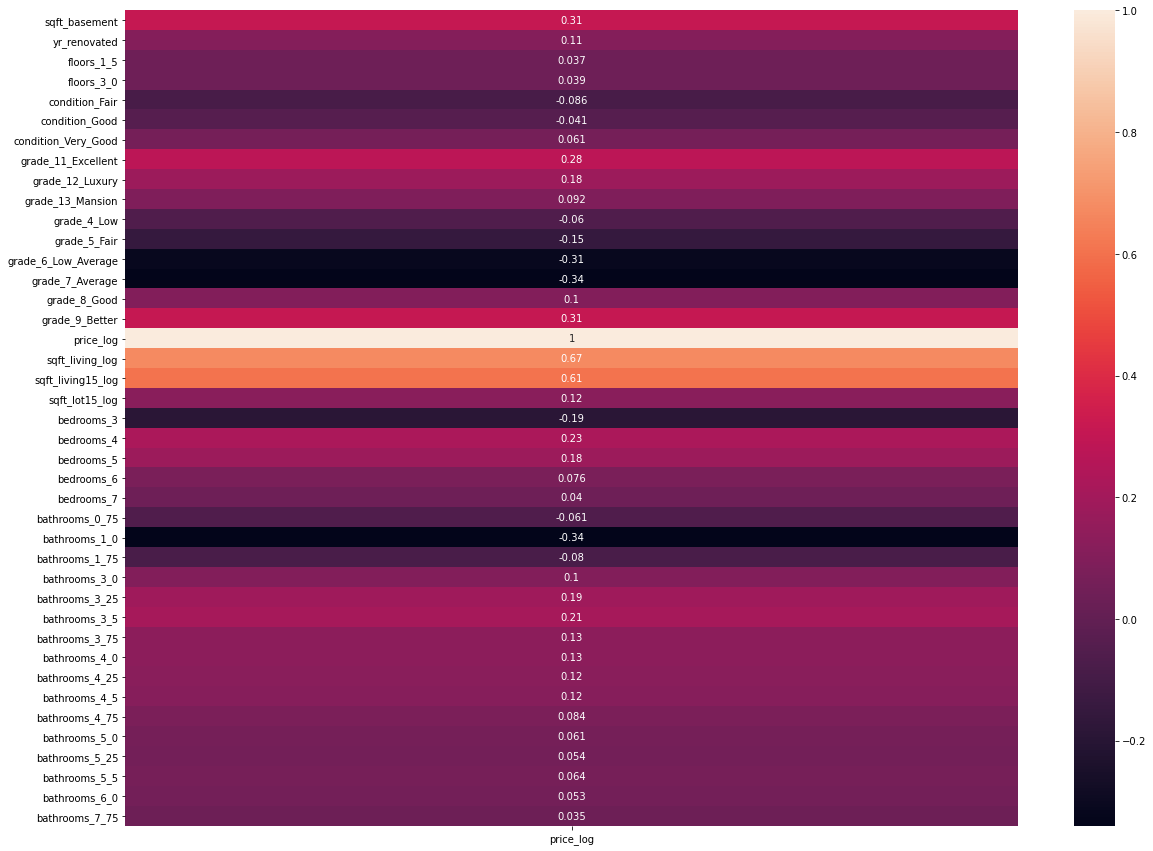

In [111]:
# Use our current df to see price_log correlations 
# https://stackoverflow.com/questions/61166285/show-only-first-column-in-a-correlation-matrix-in-python

# Create figure for plot 
fig, ax = plt.subplots(figsize=(20,15))

# Create matrix for heatmap, for only price_log column
corr = bb_log_df1.corr()
c = corr[['price_log']]
sns.heatmap(c, annot=True, ax=ax);

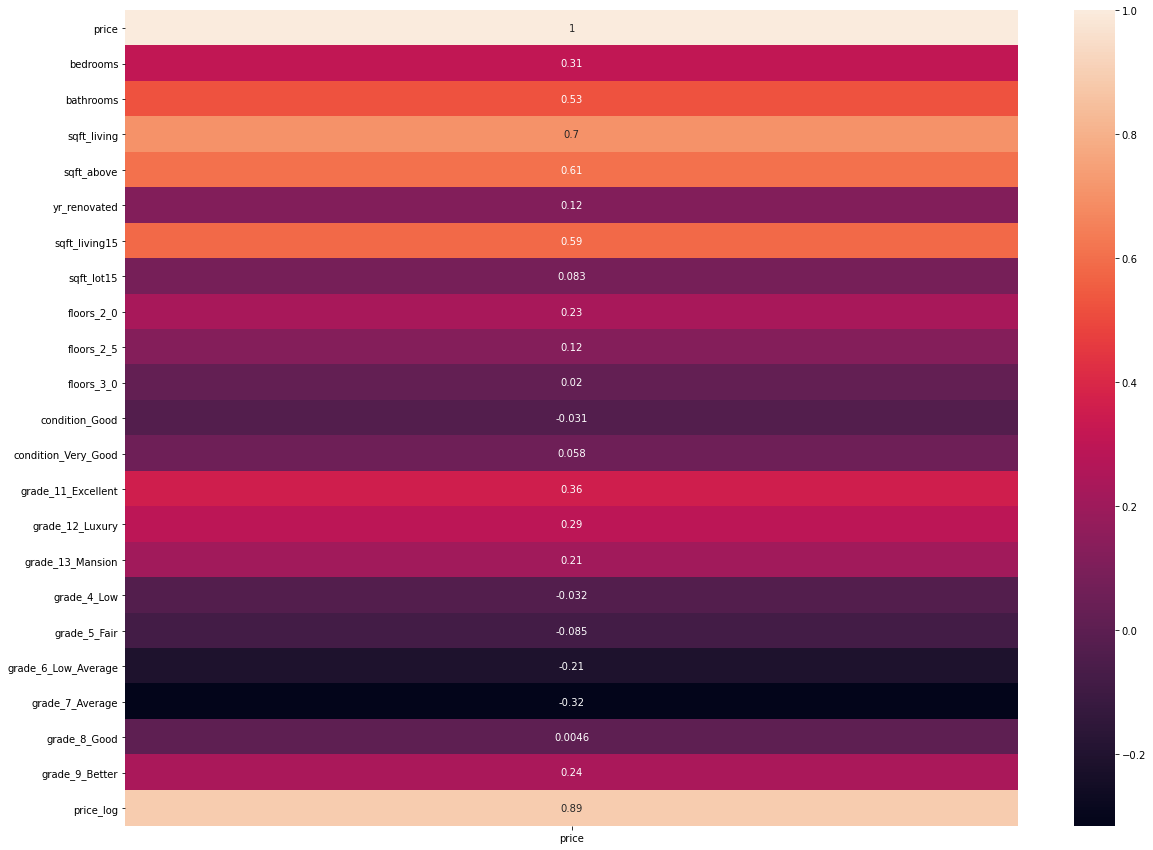

In [112]:
# Repeat the process with our original data to prepare another model need be 

# Create figure for plot 
fig, ax = plt.subplots(figsize=(20,15))

# Create matrix for heatmap, for only price_log column
corr = df_3.corr()
c = corr[['price']]
sns.heatmap(c, annot=True, ax=ax);

This is helpful, we can now make two more models. One, with the original data (after adjusting for `p-value`, and another with our current data. Instead of using every column, we will self select based on correlation, and see if our model performs better than the ones we have already created. Before doing that, since we are already looking into correlation, let's look into multicollinearity. We know that we already made a table prior to beginning modeling, called `multicol` that suggested where some of our features may become problemsome. We can look at this below.

In [113]:
# Print table from earlier 

multicol

corr
pairs                                 
(sqft_above, sqft_living)     0.876448
(sqft_living, sqft_living15)  0.756402
(sqft_living, bathrooms)      0.755758
(sqft_living15, sqft_above)   0.731767
(sqft_lot15, sqft_lot)        0.718204
(sqft_living, price)          0.701917
(sqft_above, bathrooms)       0.686668
(sqft_above, price)           0.605368

Since this was before we processed any of our data, let's see if anything has changed.

In [114]:
# Test for after we adjusted to df_3

# Create new dataframe called df_stack
stack_df3 = df_3.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Use zip and list combine the variable name columns - Columns are named level_0 and level_1 by default
stack_df3['pairs'] = list(zip(stack_df3.level_0, stack_df3.level_1))

# Set new 'pairs' column as index
stack_df3.set_index(['pairs'], inplace = True)

# Drop old columns with level names 
stack_df3.drop(columns=['level_1', 'level_0'], inplace = True)

# Change correlation column name from 0 to corr
stack_df3.columns = ['corr']

# Drop duplicates - be mindful of perfect correlations we may be dropping
stack_df3.drop_duplicates(inplace=True)

# Drop null values 
stack_df3 = stack_df3.dropna()

In [115]:
# Return dataframe with correlation over .6 and less than 1

multicol3 = (stack_df3[(stack_df3['corr'] > .6) & (stack_df3['corr'] < 1)])
multicol3

corr
pairs                                 
(price_log, price)            0.891745
(sqft_living, sqft_above)     0.876448
(sqft_living, sqft_living15)  0.756402
(sqft_living, bathrooms)      0.755758
(sqft_above, sqft_living15)   0.731767
(sqft_living, price)          0.701917
(price_log, sqft_living)      0.695185
(sqft_above, bathrooms)       0.686668
(price_log, sqft_living15)    0.619326
(price, sqft_above)           0.605368
(sqft_above, price_log)       0.601579

This looks similar to our table above. Our dataframe seems to accidentally include `price_log`, so we must change this immediately. Besides that, the rest seems identical except for having multiple price columns from when we adjusted models above. 

Typically, we would be concerned with our independent variables having correlations with an absolute value above .75. With our original data, that was the issue for `sqft_above and sqft_living`, `sqft_living and sqft_living15`, and `sqft_living and bathrooms`. The first two relationships make sense, whereas the third does not automatically seem logical, but is apparent in the data. We have adjusted our data a lot since this original chart. Let's create a version of this chart for where our data currently stands, before creating new models and removing collinear features.

In [116]:
# Create new dataframe called df_stack
stack_df_log = bb_log_df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Use zip and list combine the variable name columns - Columns are named level_0 and level_1 by default
stack_df_log['pairs'] = list(zip(stack_df_log.level_0, stack_df_log.level_1))

# Set new 'pairs' column as index
stack_df_log.set_index(['pairs'], inplace = True)

# Drop old columns with level names 
stack_df_log.drop(columns=['level_1', 'level_0'], inplace = True)

# Change correlation column name from 0 to corr
stack_df_log.columns = ['corr']

# Drop duplicates - be mindful of perfect correlations we may be dropping
stack_df_log.drop_duplicates(inplace=True)

# Drop null values 
stack_df_log = stack_df_log.dropna()

In [117]:
# Return dataframe with correlation over .6 and less than 1

multicol_log = (stack_df_log[(stack_df_log['corr'] > .6) & (stack_df_log['corr'] < 1)])
multicol_log

corr
pairs                                         
(sqft_living15_log, sqft_living_log)  0.746836
(sqft_living_log, price_log)          0.674802
(bedrooms_4, bedrooms_3)              0.624709
(sqft_living15_log, price_log)        0.607154

We can see that our current data has fewer and lower correlations above .6, in comparison to our original data, before we log transformed the continuous variables and created extra dummy variables. In fact, none of the relationships have a correlation that hit our threshold of an absolute value of .75, although `sqft_living15_log and sqft_living_log` is close. Next, we will create two new models, one with our original data, and another with our logged data. Going forward, these will be the baseline models we will use, as we can be confident that we have minimized our collinear variables.

### Models Removing Collinear Variables 
***

In [118]:
# Assign another name to bb_log_df1 basically as a copy 

df_logged = bb_log_df1

In [119]:
# Remove sqft_living15_log from bb_log_df1

bb_log_df1 = bb_log_df1.drop(['sqft_living15_log'], axis=1)

In [120]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = bb_log_df1.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=bb_log_df1).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     862.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:54   Log-Likelihood:                -6638.8
No. Observations:               21597   AIC:                         1.336e+04
Df Residuals:                   21557   BIC:                         1.368e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.5093      0.090    117.068      0.000      10.333      10.685
sqft_basement        9.161e-05   6.11e-06     14.997      0.000    7.96e-05       0.000
yr_renovated            0.0001   6.22e-06     18.167      0.000       0.000       0.000
floors_1_5              0.1759      0.008     21.498      0.000       0.160       0.192
floors_3_0              0.0881      0.015      6.059      0.000       0.060       0.117
condition_Fair         -0.0864      0.026     -3.364      0.001      -0.137      -0.036
condition_Good          0.0912      0.005     16.701      0.000       0.080       0.102
condition_Very_Good     0.2045      0.009     23.393      0.000       0.187       0.222
grade_11_Excellent      0.1909      0.020      9.707      0.000       0.152       0.229
grade_12_Luxury         0.4379      0.038     11.588      0.000       0.364       0.512
grade_13_Mansion        0.6600      0.098      6.738      0.000       0.468       0.852
grade_4_Low            -1.0478      0.069    -15.268      0.000      -1.182      -0.913
grade_5_Fair           -1.0120      0.026    -38.444      0.000      -1.064      -0.960
grade_6_Low_Average    -0.8716      0.016    -54.689      0.000      -0.903      -0.840
grade_7_Average        -0.6738      0.013    -52.207      0.000      -0.699      -0.649
grade_8_Good           -0.4638      0.012    -38.613      0.000      -0.487      -0.440
grade_9_Better         -0.2072      0.012    -17.151      0.000      -0.231      -0.184
sqft_living_log         0.4643      0.012     38.906      0.000       0.441       0.488
sqft_lot15_log         -0.0479      0.003    -15.051      0.000      -0.054      -0.042
bedrooms_3             -0.1423      0.008    -18.173      0.000      -0.158      -0.127
bedrooms_4             -0.1671      0.009    -18.009      0.000      -0.185      -0.149
bedrooms_5             -0.1665      0.012    -13.427      0.000      -0.191      -0.142
bedrooms_6             -0.1859      0.023     -8.221      0.000      -0.230      -0.142
bedrooms_7             -0.2408      0.055     -4.390      0.000      -0.348      -0.133
bathrooms_0_75          0.1292      0.042      3.074      0.002       0.047       0.212
bathrooms_1_0           0.0646      0.008      7.742      0.000       0.048       0.081
bathrooms_1_75          0.0409      0.007      5.798      0.000       0.027       0.055
bathrooms_3_0           0.0412      0.013      3.253      0.001       0.016       0.066
bathrooms_3_25          0.0999      0.015      6.864      0.000       0.071       0.128
bathrooms_3_5           0.0658      0.013      4.890      0.000       0.039       0.092
bathrooms_3_75          0.1880      0.027      6.864      0.000       0.134       0.242
bathrooms_4_0           0.1391      0.029      4.719      0.000       0.081       0.197
bat

This does not perform as well as our model that included `sqft_living15_log`. Since removing that column actually was not necessary, let's keep it in for now. Let's also remove some other variables with lower correlations with `price_log`, from that same model, and see how it performs.

In [121]:
# Remove self selected variables from df_logged 

df_logged1 = bb_log_df1.drop(['floors_1_5', 'floors_3_0', 'bathrooms_7_75', 'bathrooms_4_75',
                           'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5', 'bathrooms_6_0',
                           'bathrooms_1_75', 'bathrooms_0_75', 'bedrooms_6',
                           'bedrooms_7', 'floors_1_5', 'floors_3_0'], axis=1)

In [122]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = df_logged1.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=df_logged1).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     1187.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:54   Log-Likelihood:                -6957.3
No. Observations:               21597   AIC:                         1.397e+04
Df Residuals:                   21569   BIC:                         1.419e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              10.6671      0.086    124.051      0.000      10.499      10.836
sqft_basement        8.624e-05   6.13e-06     14.067      0.000    7.42e-05    9.83e-05
yr_renovated            0.0001    6.3e-06     19.047      0.000       0.000       0.000
condition_Fair         -0.0851      0.026     -3.266      0.001      -0.136      -0.034
condition_Good          0.1000      0.005     18.184      0.000       0.089       0.111
condition_Very_Good     0.2261      0.009     25.702      0.000       0.209       0.243
grade_11_Excellent      0.2149      0.020     10.896      0.000       0.176       0.254
grade_12_Luxury         0.4919      0.037     13.245      0.000       0.419       0.565
grade_13_Mansion        0.7771      0.094      8.293      0.000       0.593       0.961
grade_4_Low            -0.9811      0.067    -14.652      0.000      -1.112      -0.850
grade_5_Fair           -0.9977      0.027    -37.643      0.000      -1.050      -0.946
grade_6_Low_Average    -0.8630      0.016    -54.050      0.000      -0.894      -0.832
grade_7_Average        -0.6726      0.013    -52.243      0.000      -0.698      -0.647
grade_8_Good           -0.4667      0.012    -38.608      0.000      -0.490      -0.443
grade_9_Better         -0.2153      0.012    -17.611      0.000      -0.239      -0.191
sqft_living_log         0.4510      0.011     39.457      0.000       0.429       0.473
sqft_lot15_log         -0.0553      0.003    -17.801      0.000      -0.061      -0.049
bedrooms_3             -0.1125      0.007    -15.221      0.000      -0.127      -0.098
bedrooms_4             -0.1293      0.009    -15.010      0.000      -0.146      -0.112
bedrooms_5             -0.1158      0.012     -9.853      0.000      -0.139      -0.093
bathrooms_1_0           0.0673      0.008      8.528      0.000       0.052       0.083
bathrooms_3_0           0.0278      0.013      2.178      0.029       0.003       0.053
bathrooms_3_25          0.0876      0.015      5.970      0.000       0.059       0.116
bathrooms_3_5           0.0455      0.014      3.361      0.001       0.019       0.072
bathrooms_3_75          0.1624      0.028      5.869      0.000       0.108       0.217
bathrooms_4_0           0.1021      0.030      3.440      0.001       0.044       0.160
bathrooms_4_25          0.1489      0.039      3.846      0.000       0.073       0.225
bathrooms_4_5           0.0661      0.035      1.914      0.056      -0.002       0.134
==============================================================================
Omnibus:                       26.164   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.204
Skew:                           0.066   Prob(JB):                     1.24e-06
Kurtosis:                       3.113  

Removing these lower correlated variables did not increase our `r-squared`, we will keep this in mind. Now, we will create another modeled controlled for multicollinearity from our dataframe before the log transformations.

In [123]:
# Remove collinear variables from df_3 and rename 

df_corr = df_3.drop(['sqft_above', 'sqft_living15', 'sqft_lot15', 'price_log'], axis=1)

In [124]:
# Adjust and run new model 

# Use price_log as dependent variable 
outcome = 'price'

# Use columns except for price_log as independent variables
predictors = df_corr.drop('price', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=df_corr).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     1902.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:54   Log-Likelihood:            -2.9713e+05
No. Observations:               21597   AIC:                         5.943e+05
Df Residuals:                   21578   BIC:                         5.944e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            5.633e+05   1.25e+04     45.118      0.000    5.39e+05    5.88e+05
bedrooms            -2.568e+04   2178.359    -11.787      0.000   -2.99e+04   -2.14e+04
bathrooms            1.175e+04   3537.855      3.320      0.001    4811.636    1.87e+04
sqft_living           169.0368      3.560     47.476      0.000     162.058     176.016
yr_renovated           96.3360      4.300     22.404      0.000      87.908     104.764
floors_2_0          -5.847e+04   4193.725    -13.942      0.000   -6.67e+04   -5.03e+04
floors_2_5           1.231e+05   1.84e+04      6.685      0.000     8.7e+04    1.59e+05
floors_3_0           4.832e+04   1.01e+04      4.763      0.000    2.84e+04    6.82e+04
condition_Good       5.572e+04   3794.958     14.682      0.000    4.83e+04    6.32e+04
condition_Very_Good  1.384e+05   6036.290     22.932      0.000    1.27e+05     1.5e+05
grade_11_Excellent   2.802e+05   1.36e+04     20.668      0.000    2.54e+05    3.07e+05
grade_12_Luxury      7.978e+05   2.59e+04     30.854      0.000    7.47e+05    8.49e+05
grade_13_Mansion     1.917e+06   6.49e+04     29.518      0.000    1.79e+06    2.04e+06
grade_4_Low         -4.639e+05   4.52e+04    -10.254      0.000   -5.53e+05   -3.75e+05
grade_5_Fair        -4.743e+05   1.78e+04    -26.595      0.000   -5.09e+05   -4.39e+05
grade_6_Low_Average -4.492e+05    1.1e+04    -40.877      0.000   -4.71e+05   -4.28e+05
grade_7_Average     -4.086e+05   9104.085    -44.880      0.000   -4.26e+05   -3.91e+05
grade_8_Good        -3.319e+05   8364.402    -39.678      0.000   -3.48e+05   -3.15e+05
grade_9_Better      -1.936e+05   8352.943    -23.177      0.000    -2.1e+05   -1.77e+05
==============================================================================
Omnibus:                    13603.014   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           473482.045
Skew:                           2.497   Prob(JB):                         0.00
Kurtosis:                      25.388   Cond. No.                     9.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This is in the same `r-squared` range that we have been seeing so far, and nearly identical to our `r-squared` with our log transformations.

### Min Max Scaling 
***

Before moving onto our final model, conclusions, remmomendations, and next steps, we want to scale the data. We know that a good rule of thumb is to check your features for normality, and scale your features at a similar point so they have similar magnitudes. We already used log transformations, and at this point, know that it has helped our data follow a normal distribution, reduced skewness, and helped reduce the variability of the data. Our final model will include these transformations. Now, we want to perfrom min-max scaling, where we will transform x to get the transformed $x'$ by using the formula:

$$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$$

This will bring all values between 0 and 1. After this, we will try another scaling method, using standardization.

In [125]:
# Let's work with our df_logged data 

df_logged.columns

Index(['sqft_basement', 'yr_renovated', 'floors_1_5', 'floors_3_0',
       'condition_Fair', 'condition_Good', 'condition_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'price_log', 'sqft_living_log',
       'sqft_living15_log', 'sqft_lot15_log', 'bedrooms_3', 'bedrooms_4',
       'bedrooms_5', 'bedrooms_6', 'bedrooms_7', 'bathrooms_0_75',
       'bathrooms_1_0', 'bathrooms_1_75', 'bathrooms_3_0', 'bathrooms_3_25',
       'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25',
       'bathrooms_4_5', 'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25',
       'bathrooms_5_5', 'bathrooms_6_0', 'bathrooms_7_75'],
      dtype='object')

In [126]:
# Import preprocessing from sklearn to use MinMaxScaler
# https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization
from sklearn import preprocessing

# Use MinMaxScaler() to apply to continuous variables in our df_logged dataframe 
mm_scale = preprocessing.MinMaxScaler().fit(df_logged[['sqft_living_log', 'sqft_basement', 'price_log']])

# Transform 
mm_df = mm_scale.transform(df_logged[['sqft_living_log', 'sqft_basement', 'price_log']])

In [127]:
# Create df from mm_df array 
mm_df = pd.DataFrame(mm_df)

# Name new columns 
mm_df['sqft_scaled'] = mm_df[0]
mm_df['sq_base_scaled'] = mm_df[1]
mm_df['price_scaled'] = mm_df[2]

# Drop unnamed columns 
mm_df = mm_df.drop([0,1,2], axis=1)

# Check this worked
mm_df.head()

sqft_scaled  sq_base_scaled  price_scaled
0     0.322166        0.000000      0.227669
1     0.538392        0.082988      0.420522
2     0.203585        0.000000      0.182099
3     0.463123        0.188797      0.445720
4     0.420302        0.000000      0.408883

In [128]:
# Use concat to add scaled columns to df_logged 
minmax_df = pd.concat([mm_df, df_logged], axis=1)

# Check this
minmax_df.columns

Index(['sqft_scaled', 'sq_base_scaled', 'price_scaled', 'sqft_basement',
       'yr_renovated', 'floors_1_5', 'floors_3_0', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'price_log', 'sqft_living_log', 'sqft_living15_log',
       'sqft_lot15_log', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bathrooms_0_75', 'bathrooms_1_0',
       'bathrooms_1_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_6_0', 'bathrooms_7_75'],
      dtype='object')

In [129]:
# Drop the original form of the variables we just scaled 

minmax_df = minmax_df.drop(['sqft_living_log', 'sqft_basement', 'price_log'], axis=1)

In [130]:
# Regression 

# Use price_log as dependent variable 
outcome = 'price_scaled'

# Use columns except for price_log as independent variables
predictors = minmax_df.drop('price_scaled', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=minmax_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_scaled   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     888.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:54   Log-Likelihood:                 26649.
No. Observations:               21597   AIC:                        -5.322e+04
Df Residuals:                   21556   BIC:                        -5.289e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0082      0.018     -0.463      0.643      -0.043       0.027
sqft_scaled             0.2664      0.010     26.991      0.000       0.247       0.286
sq_base_scaled          0.1100      0.006     17.387      0.000       0.098       0.122
yr_renovated         2.632e-05   1.33e-06     19.735      0.000    2.37e-05    2.89e-05
floors_1_5              0.0409      0.002     23.341      0.000       0.038       0.044
floors_3_0              0.0273      0.003      8.739      0.000       0.021       0.033
condition_Fair         -0.0183      0.005     -3.321      0.001      -0.029      -0.007
condition_Good          0.0202      0.001     17.308      0.000       0.018       0.023
condition_Very_Good     0.0465      0.002     24.804      0.000       0.043       0.050
grade_11_Excellent      0.0365      0.004      8.667      0.000       0.028       0.045
grade_12_Luxury         0.0885      0.008     10.934      0.000       0.073       0.104
grade_13_Mansion        0.1414      0.021      6.743      0.000       0.100       0.183
grade_4_Low            -0.2195      0.015    -14.936      0.000      -0.248      -0.191
grade_5_Fair           -0.2011      0.006    -35.401      0.000      -0.212      -0.190
grade_6_Low_Average    -0.1672      0.004    -47.607      0.000      -0.174      -0.160
grade_7_Average        -0.1286      0.003    -45.256      0.000      -0.134      -0.123
grade_8_Good           -0.0902      0.003    -34.657      0.000      -0.095      -0.085
grade_9_Better         -0.0408      0.003    -15.756      0.000      -0.046      -0.036
sqft_living15_log       0.0671      0.002     27.252      0.000       0.062       0.072
sqft_lot15_log         -0.0145      0.001    -20.769      0.000      -0.016      -0.013
bedrooms_3             -0.0294      0.002    -17.509      0.000      -0.033      -0.026
bedrooms_4             -0.0356      0.002    -17.907      0.000      -0.039      -0.032
bedrooms_5             -0.0354      0.003    -13.339      0.000      -0.041      -0.030
bedrooms_6             -0.0357      0.005     -7.375      0.000      -0.045      -0.026
bedrooms_7             -0.0436      0.012     -3.713      0.000      -0.067      -0.021
bathrooms_0_75          0.0243      0.009      2.705      0.007       0.007       0.042
bathrooms_1_0           0.0142      0.002      7.957      0.000       0.011       0.018
bathrooms_1_75          0.0093      0.002      6.135      0.000       0.006       0.012
bathrooms_3_0           0.0116      0.003      4.282      0.000       0.006       0.017
bathrooms_3_25          0.0236      0.003      7.573      0.000       0.017       0.030
bathrooms_3_5           0.0179      0.003      6.216      0.000       0.012       0.024
bathrooms_3_75          0.0458      0.006      7.808      0.000       0.034       0.057
bat

This does not perform as well as our purely log transformed model, but we also have dropped a few variables since then, due to collinearity. Let's try scaling via **Standardization** next.

##### Standardization Scaling 
***

This method of scaling is also referred to as `z-score normalization`. Here, we scale the features so that they have the properties. of a standard normal distribution where: 

x' will have mean $\mu = 0$ and $\sigma = 1$

It is calculated as follows:

$$x' = \dfrac{x - \bar x}{\sigma}$$

This method will not make the data more normal, but it will change the mean and standard error. Although we are not positive as to the best method of scaling here, we know that using the standardization method does not hurt.

In [131]:
# Use a similar process as we did with the MinMaxScaler

std_scale = preprocessing.StandardScaler().fit(df_logged[['sqft_living_log', 'sqft_basement', 'price_log']])
std_df = std_scale.transform(df_logged[['sqft_living_log', 'sqft_basement', 'price_log']])

In [132]:
# Check that this worked 
# https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization

print('Mean after standardization:\nSqft Living={:.2f}, Sqft Basement={:.2f}, Price={:.2f}'
      .format(std_df[:,0].mean(), std_df[:,1].mean(), std_df[:,2].mean()))
print('\nStandard deviation after standardization:\nSqft Living={:.2f}, Sqft Basement ={:.2f}, Price={:.2f}'
      .format(std_df[:,0].std(), std_df[:,1].std(), std_df[:,1].std()))

Mean after standardization:
Sqft Living=-0.00, Sqft Basement=-0.00, Price=0.00

Standard deviation after standardization:
Sqft Living=1.00, Sqft Basement =1.00, Price=1.00


In [133]:
# Create df from std_df array 
std_df = pd.DataFrame(std_df)

# Name new columns 
std_df['sqft_scaled'] = std_df[0]
std_df['sq_base_scaled'] = std_df[1]
std_df['price_scaled'] = std_df[2]

# Drop unnamed columns 
std_df = std_df.drop([0,1,2], axis=1)

# Check this worked
std_df.head()

sqft_scaled  sq_base_scaled  price_scaled
0    -1.125582       -0.649637     -1.402030
1     0.709463        0.259847      0.279945
2    -2.131943       -0.649637     -1.799472
3     0.070676        1.419440      0.499710
4    -0.292732       -0.649637      0.178438

In [134]:
# Use concat to add scaled columns to df_logged 
stand_df = pd.concat([std_df, df_logged], axis=1)

# Check this
stand_df.columns

Index(['sqft_scaled', 'sq_base_scaled', 'price_scaled', 'sqft_basement',
       'yr_renovated', 'floors_1_5', 'floors_3_0', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'price_log', 'sqft_living_log', 'sqft_living15_log',
       'sqft_lot15_log', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bedrooms_7', 'bathrooms_0_75', 'bathrooms_1_0',
       'bathrooms_1_75', 'bathrooms_3_0', 'bathrooms_3_25', 'bathrooms_3_5',
       'bathrooms_3_75', 'bathrooms_4_0', 'bathrooms_4_25', 'bathrooms_4_5',
       'bathrooms_4_75', 'bathrooms_5_0', 'bathrooms_5_25', 'bathrooms_5_5',
       'bathrooms_6_0', 'bathrooms_7_75'],
      dtype='object')

In [135]:
# Drop the original form of the variables we just scaled 

stand_df = stand_df.drop(['sqft_living_log', 'sqft_basement', 'price_log'], axis=1)

In [136]:
# Regression 

# Use price_log as dependent variable 
outcome = 'price_scaled'

# Use columns except for price_log as independent variables
predictors = stand_df.drop('price_scaled', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=stand_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_scaled   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     888.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:55   Log-Likelihood:                -20126.
No. Observations:               21597   AIC:                         4.033e+04
Df Residuals:                   21556   BIC:                         4.066e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3457      0.166    -14.136      0.000      -2.671      -2.020
sqft_scaled             0.2738      0.010     26.991      0.000       0.254       0.294
sq_base_scaled          0.0875      0.005     17.387      0.000       0.078       0.097
yr_renovated            0.0002   1.16e-05     19.735      0.000       0.000       0.000
floors_1_5              0.3571      0.015     23.341      0.000       0.327       0.387
floors_3_0              0.2384      0.027      8.739      0.000       0.185       0.292
condition_Fair         -0.1593      0.048     -3.321      0.001      -0.253      -0.065
condition_Good          0.1765      0.010     17.308      0.000       0.157       0.196
condition_Very_Good     0.4051      0.016     24.804      0.000       0.373       0.437
grade_11_Excellent      0.3185      0.037      8.667      0.000       0.246       0.391
grade_12_Luxury         0.7719      0.071     10.934      0.000       0.634       0.910
grade_13_Mansion        1.2334      0.183      6.743      0.000       0.875       1.592
grade_4_Low            -1.9146      0.128    -14.936      0.000      -2.166      -1.663
grade_5_Fair           -1.7538      0.050    -35.401      0.000      -1.851      -1.657
grade_6_Low_Average    -1.4582      0.031    -47.607      0.000      -1.518      -1.398
grade_7_Average        -1.1218      0.025    -45.256      0.000      -1.170      -1.073
grade_8_Good           -0.7866      0.023    -34.657      0.000      -0.831      -0.742
grade_9_Better         -0.3562      0.023    -15.756      0.000      -0.400      -0.312
sqft_living15_log       0.5852      0.021     27.252      0.000       0.543       0.627
sqft_lot15_log         -0.1264      0.006    -20.769      0.000      -0.138      -0.115
bedrooms_3             -0.2561      0.015    -17.509      0.000      -0.285      -0.227
bedrooms_4             -0.3103      0.017    -17.907      0.000      -0.344      -0.276
bedrooms_5             -0.3090      0.023    -13.339      0.000      -0.354      -0.264
bedrooms_6             -0.3116      0.042     -7.375      0.000      -0.394      -0.229
bedrooms_7             -0.3805      0.102     -3.713      0.000      -0.581      -0.180
bathrooms_0_75          0.2124      0.078      2.705      0.007       0.058       0.366
bathrooms_1_0           0.1240      0.016      7.957      0.000       0.093       0.155
bathrooms_1_75          0.0808      0.013      6.135      0.000       0.055       0.107
bathrooms_3_0           0.1012      0.024      4.282      0.000       0.055       0.148
bathrooms_3_25          0.2058      0.027      7.573      0.000       0.153       0.259
bathrooms_3_5           0.1563      0.025      6.216      0.000       0.107       0.206
bathrooms_3_75          0.3995      0.051      7.808      0.000       0.299       0.500
bat

Our `r-squared` value is nearly identical to when we used the `Mix Max Scaling` method. Although the `Min Max` method can be helpful, if we choose to use one of these, we will likely stick to `Standardization`. For now, let's look at our outliers and see if we can do anything productive there. 

### Adjust for Outliers 
***
Another adjustment that we may be able to make, to help improve the predictive power of our models, is to remove outliers. There are multiple ways to do this. Inter Quartile Range (IQR) is one way that we can deal with detecting and removing our outliers. This method includes:

- Finding Q1
- Finding Q3
- Calculating the IQR with Q3 - Q1
- Defining the normal data range with the lower limit of Q1 - 1.5 * IQR and upper limit of Q3 + 1.5 * IQR
- Removing any data points outside this range as they wouldbe considered outliers

We will do this below, as we know that including outliers in our data could be risky. After this, we may also try running a model where we remove outliers via z-score, for those values that are further than 3 standard deviations away from the mean.

In [137]:
# Rename dataframe
# https://towardsdatascience.com/outlier-detection-part1-821d714524c
out_df = df_logged

# Include calculations column by column 
Q1 = df_logged.quantile(0.25)
Q3 = df_logged.quantile(0.75)
IQR = Q3-Q1

# Only include data that is within 1.5 * the IQR 
out_df = out_df[~((out_df<(Q1-1.5*IQR)) | (out_df>(Q3+1.5*IQR)))]

In [138]:
# Check data 

out_df.head()

sqft_basement  yr_renovated  floors_1_5  floors_3_0  condition_Fair  \
0            0.0           0.0         0.0         0.0             0.0   
1          400.0           NaN         0.0         0.0             0.0   
2            0.0           0.0         0.0         0.0             0.0   
3          910.0           0.0         0.0         0.0             0.0   
4            0.0           0.0         0.0         0.0             0.0   

   condition_Good  condition_Very_Good  grade_11_Excellent  grade_12_Luxury  \
0               0                  0.0                 0.0              0.0   
1               0                  0.0                 0.0              0.0   
2               0                  0.0                 0.0              0.0   
3               0                  NaN                 0.0              0.0   
4               0                  0.0                 0.0              0.0   

   grade_13_Mansion  ...  bathrooms_3_75  bathrooms_4_0  bathrooms_4_25  \
0               0.0  ...             0.0            0.0             0.0   
1               0.0  ...             0.0            0.0             0.0   
2               0.0  ...             0.0            0.0             0.0   
3               0.0  ...             0.0            0.0             0.0   
4               0.0  ...             0.0            0.0             0.0   

   bathrooms_4_5  bathrooms_4_75  bathrooms_5_0  bathrooms_5_25  \
0            0.0             0.0            0.0             0.0   
1            0.0             0.0            0.0             0.0   
2            0.0             0.0            0.0             0.0   
3            0.0             0.0            0.0             0.0   
4            0.0             0.0            0.0             0.0   

   bathrooms_5_5  bathrooms_6_0  bathrooms_7_75  
0            0.0            0.0             0.0  
1            0.0            0.0             0.0  
2            0.0            0.0             0.0  
3            0.0            0.0             0.0  
4            0.0            0.0             0.0  

[5 rows x 41 columns]

In [139]:
# Run outlier free model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = out_df.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=out_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     465.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:55   Log-Likelihood:                -1482.7
No. Observations:                6308   AIC:                             2985.
Df Residuals:                    6298   BIC:                             3053.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.6068      0.194     49.449      0.000       9.226       9.988
sqft_basement           0.0001    1.2e-05     11.668      0.000       0.000       0.000
yr_renovated         1.932e-14   1.96e-15      9.843      0.000    1.55e-14    2.32e-14
floors_1_5          -1.319e-14   1.33e-15     -9.918      0.000   -1.58e-14   -1.06e-14
floors_3_0          -5.855e-15      6e-16     -9.765      0.000   -7.03e-15   -4.68e-15
condition_Fair      -4.611e-15   4.93e-16     -9.349      0.000   -5.58e-15   -3.64e-15
condition_Good          0.0848      0.009      9.037      0.000       0.066       0.103
condition_Very_Good  2.212e-15   2.28e-16      9.691      0.000    1.76e-15    2.66e-15
grade_11_Excellent  -5.452e-16   3.91e-17    -13.957      0.000   -6.22e-16   -4.69e-16
grade_12_Luxury              0          0        nan        nan           0           0
grade_13_Mansion             0          0        nan        nan           0           0
grade_4_Low                  0          0        nan        nan           0           0
grade_5_Fair                 0          0        nan        nan           0           0
grade_6_Low_Average          0          0        nan        nan           0           0
grade_7_Average        -0.5880      0.021    -27.663      0.000      -0.630      -0.546
grade_8_Good           -0.4069      0.019    -21.344      0.000      -0.444      -0.370
grade_9_Better               0          0        nan        nan           0           0
sqft_living_log         0.3761      0.024     15.628      0.000       0.329       0.423
sqft_living15_log       0.2158      0.024      8.981      0.000       0.169       0.263
sqft_lot15_log         -0.0655      0.009     -6.984      0.000      -0.084      -0.047
bedrooms_3             -0.1429      0.018     -8.097      0.000      -0.177      -0.108
bedrooms_4             -0.1772      0.019     -9.311      0.000      -0.215      -0.140
bedrooms_5                   0          0        nan        nan           0           0
bedrooms_6                   0          0        nan        nan           0           0
bedrooms_7                   0          0        nan        nan           0           0
bathrooms_0_75               0          0        nan        nan           0           0
bathrooms_1_0                0          0        nan        nan           0           0
bathrooms_1_75               0          0        nan        nan           0           0
bathrooms_3_0                0          0        nan        nan           0           0
bathrooms_3_25               0          0        nan        nan           0           0
bathrooms_3_5                0          0        nan        nan           0           0
bathrooms_3_75               0          0        nan        nan           0           0
bat

In [140]:
# Import scipy.stats to use .zscore() function
import scipy.stats as stats

# Use .zscore to retrieve scores from our dataframe 
z_scor = stats.zscore(df_logged)

# Find absolute values
abs_scor = np.abs(z_scor)

# Only include column data within 3 standard deviations of its mean 
non_out = (abs_scor < 3).all(axis=1)

# Created new dataframe without outliers 
df_out = df_logged[non_out]

In [141]:
df_logged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sqft_basement        21597 non-null  float64
 1   yr_renovated         21597 non-null  int64  
 2   floors_1_5           21597 non-null  uint8  
 3   floors_3_0           21597 non-null  uint8  
 4   condition_Fair       21597 non-null  uint8  
 5   condition_Good       21597 non-null  uint8  
 6   condition_Very_Good  21597 non-null  uint8  
 7   grade_11_Excellent   21597 non-null  uint8  
 8   grade_12_Luxury      21597 non-null  uint8  
 9   grade_13_Mansion     21597 non-null  uint8  
 10  grade_4_Low          21597 non-null  uint8  
 11  grade_5_Fair         21597 non-null  uint8  
 12  grade_6_Low_Average  21597 non-null  uint8  
 13  grade_7_Average      21597 non-null  uint8  
 14  grade_8_Good         21597 non-null  uint8  
 15  grade_9_Better       21597 non-null 

In [142]:
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12193 entries, 0 to 21595
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sqft_basement        12193 non-null  float64
 1   yr_renovated         12193 non-null  int64  
 2   floors_1_5           12193 non-null  uint8  
 3   floors_3_0           12193 non-null  uint8  
 4   condition_Fair       12193 non-null  uint8  
 5   condition_Good       12193 non-null  uint8  
 6   condition_Very_Good  12193 non-null  uint8  
 7   grade_11_Excellent   12193 non-null  uint8  
 8   grade_12_Luxury      12193 non-null  uint8  
 9   grade_13_Mansion     12193 non-null  uint8  
 10  grade_4_Low          12193 non-null  uint8  
 11  grade_5_Fair         12193 non-null  uint8  
 12  grade_6_Low_Average  12193 non-null  uint8  
 13  grade_7_Average      12193 non-null  uint8  
 14  grade_8_Good         12193 non-null  uint8  
 15  grade_9_Better       12193 non-null 

In [143]:
# Run the outlier controlled model 

# Use price_log as dependent variable 
outcome = 'price_log'

# Use columns except for price_log as independent variables
predictors = df_out.drop('price_log', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors.columns)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=df_out).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     795.1
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:55   Log-Likelihood:                -3208.1
No. Observations:               12193   AIC:                             6442.
Df Residuals:                   12180   BIC:                             6539.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               9.2807      0.132     70.386      0.000       9.022       9.539
sqft_basement           0.0001   8.94e-06     15.267      0.000       0.000       0.000
yr_renovated         -3.45e-15   4.27e-16     -8.087      0.000   -4.29e-15   -2.61e-15
floors_1_5           4.626e-16   7.47e-17      6.190      0.000    3.16e-16    6.09e-16
floors_3_0           7.448e-15   9.02e-16      8.256      0.000    5.68e-15    9.22e-15
condition_Fair       2.948e-15   3.67e-16      8.024      0.000    2.23e-15    3.67e-15
condition_Good          0.0781      0.007     11.781      0.000       0.065       0.091
condition_Very_Good -1.813e-15   2.49e-16     -7.268      0.000    -2.3e-15   -1.32e-15
grade_11_Excellent   1.395e-15   2.15e-16      6.474      0.000    9.73e-16    1.82e-15
grade_12_Luxury      3.747e-17   5.87e-18      6.380      0.000     2.6e-17     4.9e-17
grade_13_Mansion     -1.01e-17   1.77e-18     -5.707      0.000   -1.36e-17   -6.63e-18
grade_4_Low          1.393e-18   2.56e-20     54.332      0.000    1.34e-18    1.44e-18
grade_5_Fair                 0          0        nan        nan           0           0
grade_6_Low_Average          0          0        nan        nan           0           0
grade_7_Average        -0.5689      0.018    -31.720      0.000      -0.604      -0.534
grade_8_Good           -0.3986      0.017    -23.938      0.000      -0.431      -0.366
grade_9_Better         -0.1726      0.017    -10.229      0.000      -0.206      -0.140
sqft_living_log         0.3053      0.017     17.634      0.000       0.271       0.339
sqft_living15_log       0.3261      0.016     19.815      0.000       0.294       0.358
sqft_lot15_log         -0.0619      0.005    -12.583      0.000      -0.072      -0.052
bedrooms_3             -0.1538      0.010    -14.900      0.000      -0.174      -0.134
bedrooms_4             -0.1774      0.012    -14.678      0.000      -0.201      -0.154
bedrooms_5                   0          0        nan        nan           0           0
bedrooms_6                   0          0        nan        nan           0           0
bedrooms_7                   0          0        nan        nan           0           0
bathrooms_0_75               0          0        nan        nan           0           0
bathrooms_1_0           0.0833      0.011      7.840      0.000       0.062       0.104
bathrooms_1_75          0.0461      0.008      5.532      0.000       0.030       0.062
bathrooms_3_0                0          0        nan        nan           0           0
bathrooms_3_25               0          0        nan        nan           0           0
bathrooms_3_5                0          0        nan        nan           0           0
bathrooms_3_75               0          0        nan        nan           0           0
bat

This model does not seem to be performing as well as our others. Let's work to create our final model, keep these outliers in, and keep an eye out when we are working with our assumptions to see if we need to be concerned with our data.

### Final Adjustments 
***

Before finalizing our work, let's create a chart of our original feature correlations, as well as a chart with our adjusted features, and add the highest 10-20 features into a model to see how we can improve performance. 

In [144]:
# We unintentionally have price_log in df_3 so let's drop that 

df_3 = df_3.drop('price_log', axis=1)

In [145]:
# Create variables to work with

corr_1 = df_3.corr().abs()
corr_log = df_logged.corr().abs()
corr_scale = stand_df.corr().abs()

In [146]:
# Define function to create correlation tables 

def corr_table(df, y):
    feat_list = []
    corr_list = []
    
    for x, corr in df[y].T.iteritems():
        if corr >= .2 and x != y:
            feat_list.append(x)
            corr_list.append(corr)
    
    df_c = pd.DataFrame({'x': feat_list, 'corr':corr_list}).sort_values(by=['corr'], ascending=False)
    return df_c

In [147]:
# Run function on 3 separate dataframes

corr_table(corr_1, 'price')

x      corr
2           sqft_living  0.701917
3            sqft_above  0.605368
4         sqft_living15  0.585241
1             bathrooms  0.525906
6    grade_11_Excellent  0.357589
10      grade_7_Average  0.316053
0              bedrooms  0.308787
7       grade_12_Luxury  0.291068
11       grade_9_Better  0.235859
5            floors_2_0  0.232696
8      grade_13_Mansion  0.211806
9   grade_6_Low_Average  0.209463

In [148]:
corr_table(corr_log, 'price_log')

x      corr
5      sqft_living_log  0.674802
6    sqft_living15_log  0.607154
8        bathrooms_1_0  0.339935
3      grade_7_Average  0.338852
0        sqft_basement  0.313119
4       grade_9_Better  0.309605
2  grade_6_Low_Average  0.309229
1   grade_11_Excellent  0.282354
7           bedrooms_4  0.226553
9        bathrooms_3_5  0.210193

In [149]:
corr_table(corr_scale, 'price_scaled')

x      corr
0          sqft_scaled  0.674802
6    sqft_living15_log  0.607154
8        bathrooms_1_0  0.339935
4      grade_7_Average  0.338852
1       sq_base_scaled  0.313119
5       grade_9_Better  0.309605
3  grade_6_Low_Average  0.309229
2   grade_11_Excellent  0.282354
7           bedrooms_4  0.226553
9        bathrooms_3_5  0.210193

These look great - now let's run a few models with these features included, and see how those models perform. We will make adjustments along the way.

In [150]:
df_3.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_above',
       'yr_renovated', 'sqft_living15', 'sqft_lot15', 'floors_2_0',
       'floors_2_5', 'floors_3_0', 'condition_Good', 'condition_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better'],
      dtype='object')

In [151]:
# Create model with df_3 

# Use price as dependent variable 
outcome = 'price'

# Independent variables 
x_cols = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade_11_Excellent',
         'grade_7_Average', 'bedrooms', 'grade_12_Luxury', 'grade_9_Better', 'floors_2_0',
         'grade_13_Mansion', 'grade_6_Low_Average']

# Create object to use in OLS model
predictors = '+'.join(x_cols)

# Define formula for our model
formula = outcome + '~' + predictors

# Create our fitted linear regression model
model = ols(formula=formula, data=df_3).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     2390.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:56   Log-Likelihood:            -2.9826e+05
No. Observations:               21597   AIC:                         5.965e+05
Df Residuals:                   21584   BIC:                         5.967e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             1.47e+05   9620.240     15.283      0.000    1.28e+05    1.66e+05
sqft_living           236.1269      4.892     48.272      0.000     226.539     245.715
sqft_above            -40.5365      4.862     -8.338      0.000     -50.066     -31.007
sqft_living15          52.1340      3.882     13.429      0.000      44.524      59.744
bathrooms            1.763e+04   3621.814      4.868      0.000    1.05e+04    2.47e+04
grade_11_Excellent   4.279e+05   1.37e+04     31.273      0.000    4.01e+05    4.55e+05
grade_7_Average     -7.221e+04   4341.488    -16.632      0.000   -8.07e+04   -6.37e+04
bedrooms             -3.69e+04   2258.160    -16.339      0.000   -4.13e+04   -3.25e+04
grade_12_Luxury      8.809e+05   2.71e+04     32.453      0.000    8.28e+05    9.34e+05
grade_9_Better       5.582e+04   5712.129      9.772      0.000    4.46e+04     6.7e+04
floors_2_0          -6.326e+04   4603.283    -13.743      0.000   -7.23e+04   -5.42e+04
grade_13_Mansion     1.962e+06   6.84e+04     28.675      0.000    1.83e+06     2.1e+06
grade_6_Low_Average -7.645e+04   7038.984    -10.860      0.000   -9.02e+04   -6.26e+04
==============================================================================
Omnibus:                    13068.400   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           356560.940
Skew:                           2.433   Prob(JB):                         0.00
Kurtosis:                      22.302   Cond. No.                     1.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This performs ok, but not better than any of our previous models with similar information.

In [152]:
# Create model with df_logged

# Use price as dependent variable 
outcome = 'price_log'

# Independent variables 
x_cols = ['sqft_living_log', 'bathrooms_1_0', 'sqft_basement',
         'grade_7_Average', 'grade_9_Better', 'grade_6_Low_Average',
         'bedrooms_4', 'grade_11_Excellent', 'bathrooms_3_5']

# Create object to use in OLS model
predictors = '+'.join(x_cols)

# Define formula for our model
formula = outcome + '~' + predictors

# Create our fitted linear regression model
model = ols(formula=formula, data=df_logged).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2550.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:56   Log-Likelihood:                -8971.1
No. Observations:               21597   AIC:                         1.796e+04
Df Residuals:                   21587   BIC:                         1.804e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.4268      0.075    113.058      0.000       8.281       8.573
sqft_living_log         0.6195      0.010     62.978      0.000       0.600       0.639
bathrooms_1_0           0.1052      0.008     12.655      0.000       0.089       0.121
sqft_basement           0.0001   6.42e-06     15.987      0.000    9.01e-05       0.000
grade_7_Average        -0.2089      0.006    -33.088      0.000      -0.221      -0.197
grade_9_Better          0.1306      0.009     15.238      0.000       0.114       0.147
grade_6_Low_Average    -0.3203      0.011    -29.110      0.000      -0.342      -0.299
bedrooms_4             -0.0454      0.006     -7.745      0.000      -0.057      -0.034
grade_11_Excellent      0.4789      0.020     24.313      0.000       0.440       0.517
bathrooms_3_5           0.0821      0.014      5.738      0.000       0.054       0.110
==============================================================================
Omnibus:                       57.050   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.552
Skew:                           0.122   Prob(JB):                     3.18e-13
Kurtosis:                       3.066   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We again see that our model performs better when we include more information, rather than self selecting only the highly correlated variables.

In [153]:
# Create model with stand_df

# Use price as dependent variable 
outcome = 'price_scaled'

# Independent variables 
x_cols = ['sqft_scaled', 'bathrooms_1_0', 'grade_7_Average', 'sq_base_scaled', 'grade_11_Excellent',
          'grade_9_Better', 'bedrooms_4', '', 'bathrooms_3_5','grade_6_Low_Average']

# Create object to use in OLS model
predictors = '+'.join(x_cols)

# Define formula for our model
formula = outcome + '~' + predictors

# Create our fitted linear regression model
model = ols(formula=formula, data=stand_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_scaled   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     2550.
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:56   Log-Likelihood:                -22824.
No. Observations:               21597   AIC:                         4.567e+04
Df Residuals:                   21587   BIC:                         4.575e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1620      0.009     17.504      0.000       0.144       0.180
sqft_scaled             0.4990      0.008     62.978      0.000       0.484       0.515
bathrooms_1_0           0.1998      0.016     12.655      0.000       0.169       0.231
grade_7_Average        -0.3968      0.012    -33.088      0.000      -0.420      -0.373
sq_base_scaled          0.0858      0.005     15.987      0.000       0.075       0.096
grade_11_Excellent      0.9094      0.037     24.313      0.000       0.836       0.983
grade_9_Better          0.2480      0.016     15.238      0.000       0.216       0.280
bedrooms_4             -0.0862      0.011     -7.745      0.000      -0.108      -0.064
bathrooms_3_5           0.1560      0.027      5.738      0.000       0.103       0.209
grade_6_Low_Average    -0.6084      0.021    -29.110      0.000      -0.649      -0.567
==============================================================================
Omnibus:                       57.050   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.552
Skew:                           0.122   Prob(JB):                     3.18e-13
Kurtosis:                       3.066   Cond. No.                         9.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, we see the same pattern. Let's move on to creating our final model.

##### Final Model
***
Most of the steps we have taken have been to both improve the performance of our model while also ensuring that it has been aproppriately prepared, and does not violate any of the key linear aggression assumptions. Because of this, we have seen our `r-squared` value fluctuate quite a bit. We are very comfortable with our log transformed values, as well as our standardized values. In creating the final model, we will see how we can strike a balance here and create a model that we can build accurate recommendations off of. 

In [154]:
final_df = stand_df

In [155]:
# Look at one of our current models 

# Use price as dependent variable 
outcome = 'price_scaled'

# Independent variables 
predictors = final_df.drop('price_scaled', axis=1)

# Create object to use in OLS model
pred_sum = '+'.join(predictors)

# Define formula for our model
formula = outcome + '~' + pred_sum

# Create our fitted linear regression model
model = ols(formula=formula, data=final_df).fit()

# Get regression diagnostics summary 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           price_scaled   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     888.5
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:25:56   Log-Likelihood:                -20126.
No. Observations:               21597   AIC:                         4.033e+04
Df Residuals:                   21556   BIC:                         4.066e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -2.3457      0.166    -14.136      0.000      -2.671      -2.020
sqft_scaled             0.2738      0.010     26.991      0.000       0.254       0.294
sq_base_scaled          0.0875      0.005     17.387      0.000       0.078       0.097
yr_renovated            0.0002   1.16e-05     19.735      0.000       0.000       0.000
floors_1_5              0.3571      0.015     23.341      0.000       0.327       0.387
floors_3_0              0.2384      0.027      8.739      0.000       0.185       0.292
condition_Fair         -0.1593      0.048     -3.321      0.001      -0.253      -0.065
condition_Good          0.1765      0.010     17.308      0.000       0.157       0.196
condition_Very_Good     0.4051      0.016     24.804      0.000       0.373       0.437
grade_11_Excellent      0.3185      0.037      8.667      0.000       0.246       0.391
grade_12_Luxury         0.7719      0.071     10.934      0.000       0.634       0.910
grade_13_Mansion        1.2334      0.183      6.743      0.000       0.875       1.592
grade_4_Low            -1.9146      0.128    -14.936      0.000      -2.166      -1.663
grade_5_Fair           -1.7538      0.050    -35.401      0.000      -1.851      -1.657
grade_6_Low_Average    -1.4582      0.031    -47.607      0.000      -1.518      -1.398
grade_7_Average        -1.1218      0.025    -45.256      0.000      -1.170      -1.073
grade_8_Good           -0.7866      0.023    -34.657      0.000      -0.831      -0.742
grade_9_Better         -0.3562      0.023    -15.756      0.000      -0.400      -0.312
sqft_living15_log       0.5852      0.021     27.252      0.000       0.543       0.627
sqft_lot15_log         -0.1264      0.006    -20.769      0.000      -0.138      -0.115
bedrooms_3             -0.2561      0.015    -17.509      0.000      -0.285      -0.227
bedrooms_4             -0.3103      0.017    -17.907      0.000      -0.344      -0.276
bedrooms_5             -0.3090      0.023    -13.339      0.000      -0.354      -0.264
bedrooms_6             -0.3116      0.042     -7.375      0.000      -0.394      -0.229
bedrooms_7             -0.3805      0.102     -3.713      0.000      -0.581      -0.180
bathrooms_0_75          0.2124      0.078      2.705      0.007       0.058       0.366
bathrooms_1_0           0.1240      0.016      7.957      0.000       0.093       0.155
bathrooms_1_75          0.0808      0.013      6.135      0.000       0.055       0.107
bathrooms_3_0           0.1012      0.024      4.282      0.000       0.055       0.148
bathrooms_3_25          0.2058      0.027      7.573      0.000       0.153       0.259
bathrooms_3_5           0.1563      0.025      6.216      0.000       0.107       0.206
bathrooms_3_75          0.3995      0.051      7.808      0.000       0.299       0.500
bat

In [156]:
# Get list of coefficients

model.params

Intercept             -2.345704
sqft_scaled            0.273812
sq_base_scaled         0.087507
yr_renovated           0.000230
floors_1_5             0.357132
floors_3_0             0.238355
condition_Fair        -0.159319
condition_Good         0.176501
condition_Very_Good    0.405149
grade_11_Excellent     0.318510
grade_12_Luxury        0.771892
grade_13_Mansion       1.233419
grade_4_Low           -1.914556
grade_5_Fair          -1.753776
grade_6_Low_Average   -1.458170
grade_7_Average       -1.121763
grade_8_Good          -0.786558
grade_9_Better        -0.356152
sqft_living15_log      0.585240
sqft_lot15_log        -0.126439
bedrooms_3            -0.256140
bedrooms_4            -0.310287
bedrooms_5            -0.308982
bedrooms_6            -0.311564
bedrooms_7            -0.380509
bathrooms_0_75         0.212363
bathrooms_1_0          0.124043
bathrooms_1_75         0.080818
bathrooms_3_0          0.101249
bathrooms_3_25         0.205776
bathrooms_3_5          0.156251
bathroom

This model looks pretty good, and is just over the goal we set out of having an `r-squared` value of over 60%. Right now, our `adjusted r-squared` stands at **0.622**. This tells us at 62.2% of the variations in price *y* are explained by the features in our model.

We also can be satisfied with our `p-values`, that are all lower than our alpha of .05. This tells us that our features are statistically significant in relation to the variance of our dependent variable, which is price. 

## Linear Regression Assumptions 
***
Now that we have our final model, we can look back at our assumptions again. Before we began modeling, we briefly glanced at `linearity` through `pair plots`, and as we were modeling we were able to look at and adjust for `multicollinearity`. That being said, we still need to evaluate our model for `normality` and `homoscedasticity`. 

### Normality 
The normality assumption states that in a model, the residuals should follow a normal distribution. This does not account for the distributions of the variables, only that of the residuals. That being said, throughout the data process above we have explored normality on numerous occassions and have adjusted our varibales so that the ones in our final model fit our standards of normality. We are going to check the normality assumption with a `Q-Q-Plot` and a `KDE plot`.

Here, we use the residuals from the model and draw Q-Q Plot (quantile-quantile plot) against a standard normal distribution. Typically, we are looking to make sure there are no super clear deviations from the red line. If we do not see any, then we can assume that we are okay for this normality assumption.

<ipython-input-157-05b54b1a4059>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


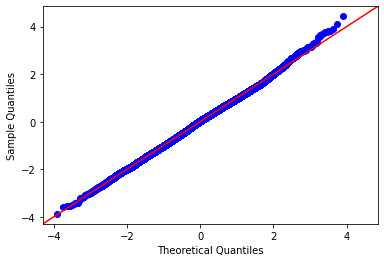

In [157]:
# Create Q-Q-Plot

residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

/Users/hana/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the residuals')

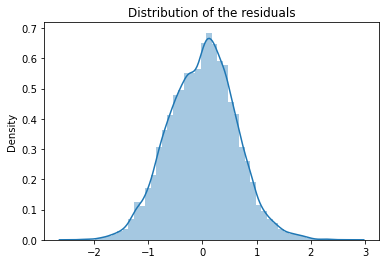

In [158]:
# Create KDE plot

sns.distplot(residuals,kde=True)
plt.title('Distribution of the residuals')

These look great and we can be confident that our model does not violate this assumption.

### Homoscedasticity 
Heteroscedasticity is when the dependent variable is not equal across the range of values of the predictors. When heteroscedasticity is present in the data, a scatterplot of the variables will appear in a cone-like shape. In other words, the pattern of the dependent variable in the plot widens or narrows as the independent variable increases in value. Alternatively, we have homoscedasticity, which tells us that a dependent variable's variability is **equal** across the independent variable values. 

In short, we want the residuals to be equal across the regression line, and we can see this in a scatterplot, which would mean the variance for the residual is the same for any value of x.

We will test this by plotting the residuals against predicted values, as well as using the `Goldfeld Quandt Test`. This is a hypothesis test where the null hypothesis predicts homoscedasticity and the alternate hypothesis predicts heteroscedasticity. Here, we want our `p-value` to be high so that we `fail to reject` the null hypothesis, and can further confirm homoscedasticity. 

/Users/hana/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/hana/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


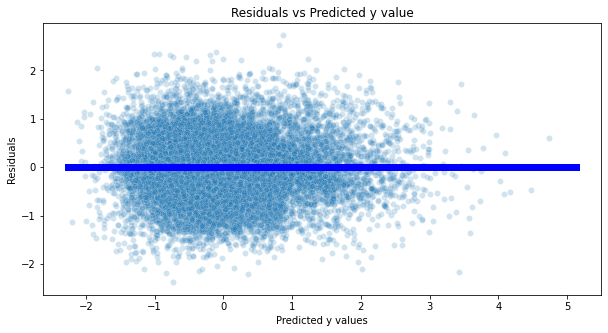

In [159]:
# Plot residuals against predicted y values 

# Return predicted values from our final model 
y_pred = model.fittedvalues

# Plot on scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(y_pred,residuals, alpha=.2)
plt.xlabel('Predicted y values')
plt.ylabel('Residuals')

# Plot line 
sns.lineplot([y_pred.min(),y_pred.max()],[0,0],color='blue', linewidth=7)
plt.title('Residuals vs Predicted y value');

In [160]:
# Run Goldfeld Quandt Test

# Import 
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# Create model intercept 
predictors_int = sm.add_constant(predictors)

# Specify return values 
name = ['F statistic', 'p-value']

# Test
test = sms.het_goldfeldquandt(residuals, predictors_int)

# Return values 
lzip(name, test)

[('F statistic', 0.9506799567313732), ('p-value', 0.9956392389753065)]

Great, this is again, what we hoped to see. Since our `p-value` is greater than our `alpha`, we fail to reject the null hypothesis. This further validates the assumption of homoscedasticity of our residuals.

### Interpreting the Results
#### Train Test Split

We discussed this in depth, earlier. Now that we have our final model, we need to validate it. We can evaluate the difference between actual price values and what our model is able to predict, using train test split and calculating the Mean Squared Error.
***

In [161]:
# Assign X and y
y = final_df[['price_scaled']]
X = final_df.drop(['price_scaled'], axis=1)

# Assign train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

# Assign linear Regression object to linreg
linreg = LinearRegression()

# Fit linreg to training data
linreg.fit(X_train, y_train)

# Assign price predictions
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Apply function to training and test sets 
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

# Print results
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.3788113321614215
Test Mean Squared Error: 0.3751327356563466


These two values are very similar, with the train set being very slightly higher than our testing set. This slightly uncommon, and tells us that we are not overfitting, in fact, if anything, we may be underfitting. 

##### Interpreting the Coefficients

When it comes to interpreting our results, we know we have to tread lightly since we have multiple log-transformed variables, including our dependent/response variable. We know that we can interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable. Additionally:

*For x percent increase, calculate 1.x to the power of the coefficient, subtract 1, and multiply by 100. Example: For every 20% increase in the independent variable, our dependent variable increases by about (1.20$^{0.198}$ – 1) * 100 = 3.7 percent.*

For our variables that are not log transformed, but of course, our response variable still is: 

*We exponentiate the coefficient, subtract one from this number, and multiply by 100. This gives the percent increase (or decrease) in the response for every one-unit increase in the independent variable.*

*https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/* 


**Below, we will define a couple of functions to help us with our log interpretations. We will then hard code and apply this to a few variables of choice that we would like to elaborate on in our conclusion and recommendations.**

In [162]:
# Create formula to calculate log interpretations for both variables transformed

def percent_change(percent, coeff):
    perchange = (((1 + (percent)) ** (coeff)) - 1) * 100
    return perchange

In [163]:
# Calculate percent change for our squarefoot living variable

sqft = percent_change(.20,  0.273812)
sqft

5.118892184069734

In [164]:
# Create formula to calculate log interpretations for only response variable transformed

def percent_change_dep(coeff):
    perchange = ((np.exp(coeff)) - 1) * 100
    return perchange

In [165]:
# Calculate percent change for our 1.75 Bathrooms variable

bath175 = percent_change_dep(0.080818)
bath175

8.417355902184642

In [166]:
# Calculate percent change for our 4 Bathrooms variable

bath4 = percent_change_dep(0.273804)
bath4

31.495704539848113

In [167]:
# Calculate percent change for our Grade 11 variable

grade11 = percent_change_dep(0.318510)
grade11

37.50773718888094

In [168]:
# Calculate percent change for our Fair Condition variable

fairhome = percent_change_dep( -0.159319)
fairhome

-14.727570347311303

In [169]:
# Calculate percent change for our Good Condition variable

goodhome = percent_change_dep(0.176501)
goodhome

19.303561979462103

## Conclusion and Recommendations
***

We have multiple insights that we will be able to share with the Sotheby's team based on our analyses.

Our original questions that we posed revolved around square footage, bedrooms, bathrooms, grade, and condition of a home. To our team, these are all areas that seem to be relevant when considering a renovation, and have the potential to increase the value of a home. After a rigorous modeling process, we have some answers. 

**Square Footage**: 
When it comes to renovating a home, focusing on the square footage of living space in the home matters. We found that for every 1% increase in square footage, there is a .27% increase in price. In other words, for every 20% increase in square footage, our price increases by about 5%. To put this into dollars, according to *Redfin* and *Rocket Homes*, **the median price of a home in King County as of September 2022 is about 815,000 dollars.** Using this as a baseline, our model tells us that if we increased our square footage by 20 percent, the value of our home would increase to $855,750. This is a **40,750 dollar** increase! 

**Bedrooms**: 
Unfortunately, our model did not provide us with convincing data on how increasing the number of bedrooms in a home would increase the value of a home. We will discuss this more in **next steps**, discussing how we can learn more about this in the future. That being said, after analyzing the distribution, we do know that while the majority of homes in King County have 3-4 bedrooms, **over 75 percent of the most expensive homes in King County have 4-5 bedrooms.** This is helpful, as we were visually able to see the impact of this jump in bedroom count.

**Bathrooms**: 
Looking at our distributions, we saw that the majority of homes in King County have between 1-2.5 bathrooms, but the majority of the most expensive homes in King County have between 3-4.5 bathrooms. As we look at the trend of our data, it is clear that as the number of bathrooms in a home increases, the price of the home increases. Every single one of our dummy variables with price is positive. From this, we can understand that the addition of each new bathroom in a home increases the value of the home by a positive percentage. For example, having 4 bathrooms adds 31.49 percent to our sale price, where having 1.75 bathrooms adds 8.42 percent to our sale price. 

**Grade**: 
We saw from the beginning that grade is one of the biggest predictors of price. This was a great finding for us, as often, renovations revolve around grade improvements. Our model shows that having a grade **above 9** adds value to our home. When our home reaches a grade status of 11, 12, and 13, we significant increases to our sale price. This tells us that this may be the prime feature to focus on with home renovations, where our homeowners are likely to reap the rewards of their investments. This is what they should aim for:

*Grade 11: Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.*

*Grade 12: Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.* 

*Grade 13: Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc*  

In short, achieving a home categorized as Grade 11 Luxury increases the value of a home by 37.5 percent. Using our same basline from our square footage calculations, this could mean **increasing the price of a home from 815,000 dollars to 1,120,625 dollars.** This is a 305,625 dollar increase!

**Condition**: 
Similar to grade, we see that condition has a large impact on selling price. Having a Fair Condition has a negative impact on our price, while having a Good or Very Good condition increases the value of our home. Again, this is unsurprising. We suggest that our homeowners aim for the following condition standards:

*4 - Good. No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.*

*5 - Very Good. All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.*

Our model tells us that **having a home categorized as Fair decreases the value of a home by about 14.73 percent, but having a home categorized as Good increases its value by about 19.39 percent.** Again, in today's market **this variation accounts for a home price that can range from 694,950.50 - 973,028.50 dollars. That is a 278,078 dollar difference!

## Next Steps
***

As confident as we are in our recommendations, there is a lot of nuance to our model and we know small changes can be a big difference. Going forward, these would be our areas of focus: 

1. Look into location - we did not analyze our zipcode or latitude and longitude data. We know the age old saying: 'Location, Location, Location.' In other words, identical homes can increase or decrease in value due to location. We want to help homeowners with how best to renovate their homes, but maybe in one part of King County, adding a bathroom detracts from the sale price, while in another area, adding a bathroom doubles the sale price? These are patterns we can begin to analyze with location data.

2. Our data is outdated, only extending to the year 2015, and only including data from 2014 and 2015. We were able to complete our analysis with this data, but further work would definitely include extending this to the current real estate climate, as we know how fickle the housing market can be.

3. A large part of our emphasis has been on improving the condition and grade of a home. But, how can we now help homeowners with the specifics of that? For condition, we can look deeper into the best ways to maintain a home, at the lowest cost to our homeowners. For grade, we can look into solid woods, bathroom fixtures, cabinet work, wood trim, marble, and entry ways, and see which of these characteristics increase selling price the most, and advise our homeowners to allocate their money in that direction.

4. Although we have seen what characteristics of renovation may be useful, we have not tracked this in relation to the cost of each renovation. This is somewhere we could direct our energy in the future. If we find that the return of time and money on adding a bathroom is far less than that of adding marble and wood trim to a home, maybe that is where we suggest our homeowners allocate their resources. 

#### Citations Referenced
***
https://www.folkstalk.com/2022/10/how-to-get-image-in-jupyter-notebook-with-code-examples.html<br>
https://stackoverflow.com/questions/61166285/show-only-first-column-in-a-correlation-matrix-in-python<br>
https://sebastianraschka.com/Articles/2014_about_feature_scaling.html#about-standardization<br>
https://towardsdatascience.com/outlier-detection-part1-821d714524c<br>
https://www.w3schools.com/python/pandas/ref_df_iteritems.asp<br>
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/<br>
https://www.redfin.com/county/118/WA/King-County/housing-market<br>
https://www.rockethomes.com/real-estate-trends/wa/king-county<br>
https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r<br>
https://www.sothebysrealty.com/eng<br>
https://kingcounty.gov/